# Recommendation social media 

# Dataset Loading

Dans le but de recommander des amis, nous utilisons le jeu de données des cercles sociaux Facebook, qui est disponible sur le site web de Stanford SNAP.

-----------------------------------------
Ce jeu de données est composé de "cercles" (ou de "listes d'amis") provenant de Facebook. Les données de Facebook ont été collectées auprès des participants à une enquête en utilisant cette application Facebook. Le jeu de données comprend des caractéristiques des nœuds (profils), des cercles et des réseaux ego.

Les données de Facebook ont été anonymisées en remplaçant les identifiants internes de Facebook pour chaque utilisateur par une nouvelle valeur. De plus, bien que des vecteurs de caractéristiques de ce jeu de données aient été fournis, l'interprétation de ces caractéristiques a été obscurcie. Par exemple, là où le jeu de données original pouvait contenir une caractéristique "politique=Parti démocrate", les nouvelles données ne contiendraient que "politique=caractéristique anonymisée 1". Ainsi, en utilisant les données anonymisées, il est possible de déterminer si deux utilisateurs ont les mêmes affiliations politiques, mais pas ce que représentent leurs affiliations politiques individuelles.







In [ ]:
!wget http://snap.stanford.edu/data/facebook.tar.gz
!tar -xvf "facebook.tar.gz"

--2023-12-12 23:20:58--  http://snap.stanford.edu/data/facebook.tar.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732104 (715K) [application/x-gzip]
Saving to: ‘facebook.tar.gz.1’

facebook.tar.gz.1   100%[===================>] 714.95K  4.02MB/s    in 0.2s    

2023-12-12 23:20:58 (4.02 MB/s) - ‘facebook.tar.gz.1’ saved [732104/732104]

facebook/
facebook/3980.egofeat
facebook/0.featnames
facebook/698.egofeat
facebook/3437.feat
facebook/3980.featnames
facebook/0.edges
facebook/3437.circles
facebook/686.circles
facebook/348.egofeat
facebook/107.feat
facebook/348.feat
facebook/1912.circles
facebook/3437.egofeat
facebook/698.feat
facebook/348.edges
facebook/1912.feat
facebook/414.circles
facebook/1684.egofeat
facebook/1684.featnames
facebook/1684.feat
facebook/107.egofeat
facebook/0.circles
facebook/414.edges
facebook/698.featnames


Le dataset présenté est issu d'une étude des réseaux d'ego sur Facebook, fourni par le projet SNAP de Stanford. Il contient 4 039 nœuds, représentant des utilisateurs individuels, et 88 234 liens symbolisant les interactions entre eux. La structure du réseau est décrite par des mesures telles qu'un coefficient de clustering moyen de 0.6055, indiquant un niveau modéré de regroupement des nœuds. Le dataset inclut également des fichiers détaillant les caractéristiques des utilisateurs, leurs connexions, ainsi que les groupes d'amis, ce qui permet une analyse approfondie des comportements sociaux et des structures de communauté sur la plateforme Facebook.


In [ ]:
!wget http://snap.stanford.edu/data/facebook_combined.txt.gz

--2023-12-12 23:21:07--  http://snap.stanford.edu/data/facebook_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218576 (213K) [application/x-gzip]
Saving to: ‘facebook_combined.txt.gz’

facebook_combined.t 100%[===================>] 213.45K  --.-KB/s    in 0.1s    

2023-12-12 23:21:07 (1.70 MB/s) - ‘facebook_combined.txt.gz’ saved [218576/218576]



# Facebook Social Circle Analysis with NetworkX

##Importation des bibliothèques nécessaires
* import networkx as nx: Cette instruction importe la bibliothèque NetworkX sous l'alias nx. NetworkX est une bibliothèque Python utilisée pour la création, la manipulation et l'étude de la structure, de la dynamique et des fonctions des réseaux complexes.

* from networkx.algorithms import approximation: Ceci importe le module d'approximation de NetworkX qui contient des algorithmes permettant d'approximer des solutions pour divers problèmes sur les graphes, souvent pour des calculs plus rapides sur de grands réseaux où des solutions exactes seraient trop coûteuses en temps.

* import matplotlib.pyplot as plt: Importe la bibliothèque de visualisation Matplotlib et utilise plt comme alias. Matplotlib est utilisé pour dessiner des graphiques et des visualisations de données.

* from collections import Counter: Importe la classe Counter du module collections. Counter est un dictionnaire sous-classe pour compter des objets hachables. C'est utile pour compter des éléments, comme le nombre de fois qu'un nœud apparaît dans un réseau.

* import random: Ce module implémente des générateurs de nombres pseudo-aléatoires pour diverses distributions et est utile pour ajouter de la stochasticité dans l'analyse de réseau, comme dans le brouillage des nœuds ou des arêtes.

* from itertools import combinations, groupby: Importe les fonctions combinations et groupby du module itertools. combinations est utilisé pour créer toutes les paires possibles de nœuds, ce qui est utile dans la création de réseaux, et groupby permet de regrouper des données.

* import statistics: Ce module fournit des fonctions pour calculer des statistiques mathématiques de base, telles que la moyenne, la médiane, la variance, etc.

* %matplotlib inline: C'est une commande magique IPython qui indique à Jupyter d'afficher les graphiques Matplotlib dans le notebook même.

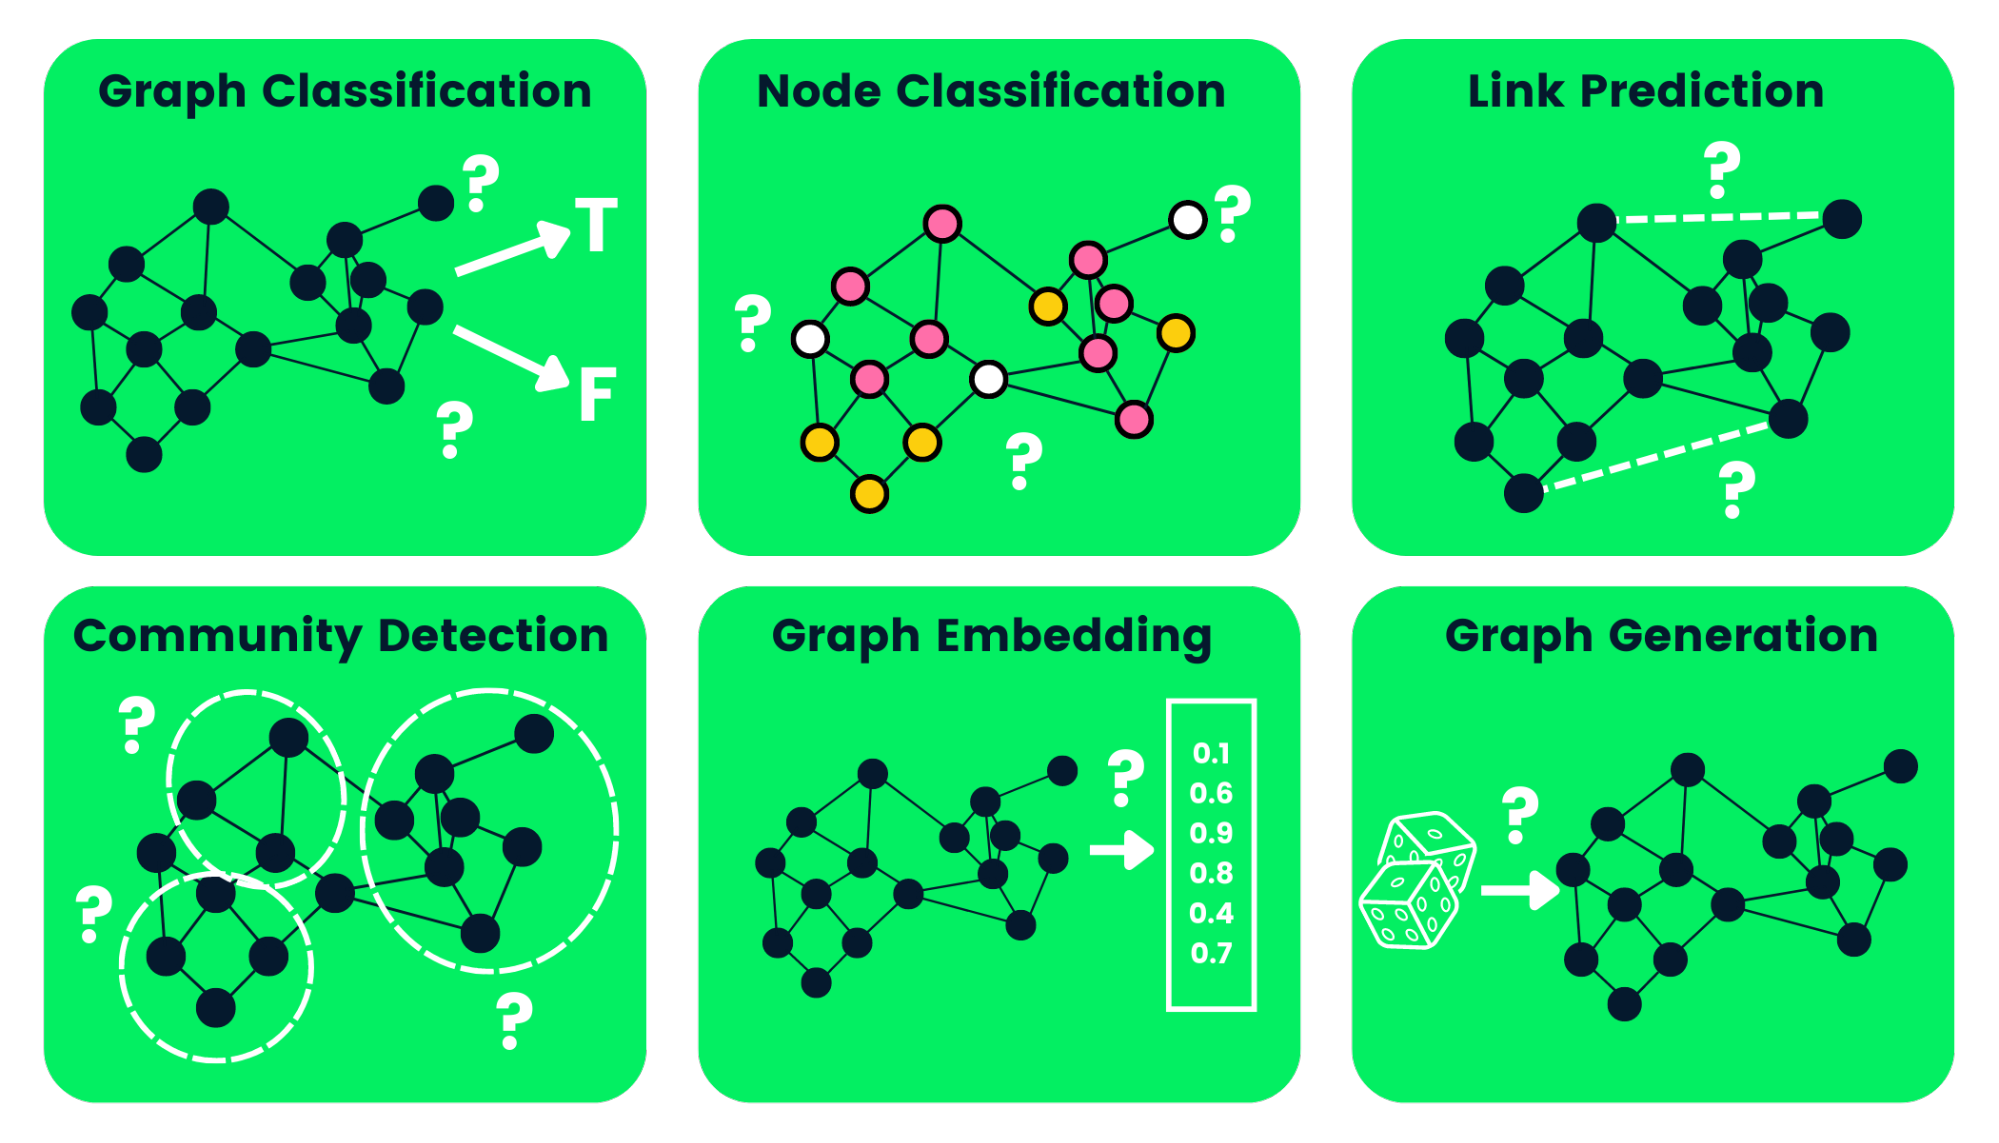

In [ ]:
import networkx as nx
from networkx.algorithms import approximation
import matplotlib.pyplot as plt
from collections import Counter
import random
from itertools import combinations, groupby

import statistics

%matplotlib inline

In [ ]:
# Importer les bibliothèques nécessaires
def explore_and_summarize_network(edgelist, vertices, subgraph, directed=False):
    """
    Résume de manière concise tout sous-graphique induit du réseau d'entrée
    """
    # Créer un graphe vide
    G = nx.Graph()

    # Si un sous-graphique est spécifié, extraire les arêtes induites
    if subgraph is not None:
        induced_edges = [edge for edge in edgelist if ((edge[0] in subgraph) and (edge[1] in subgraph))]
        G.add_nodes_from(subgraph)  # Ajouter les nœuds du sous-graphique
        G.add_edges_from(induced_edges, nodetype=int)  # Ajouter les arêtes du sous-graphique
    else:
        G.add_nodes_from(vertices)  # Ajouter tous les nœuds
        G.add_edges_from(edgelist, nodetype=int)  # Ajouter toutes les arêtes

    # (a) Afficher le graphe
    nx.draw(G, pos=nx.spring_layout(G), node_color='maroon',
            node_size=20,
            edge_color="gray",
            width=0.5)
    plt.show()

    # (b) Afficher l'histogramme des degrés (entrants ou sortants si le graphe est dirigé)
    if directed:
        in_degree_sequence = [item[-2] for item in local_summaries(G)]
        in_degree_counts = Counter(in_degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(in_degree_counts.keys(), in_degree_counts.values())
        ax.set_xlabel('Noeuds')
        ax.set_ylabel('Degré entrant')
        ax.set_title(r'Histogramme des degrés entrants')
        fig.tight_layout()
        plt.show()

        out_degree_sequence = [item[-1] for item in local_summaries(G)]
        out_degree_counts = Counter(out_degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(out_degree_counts.keys(), out_degree_counts.values())
        ax.set_xlabel('Noeuds')
        ax.set_ylabel('Degré sortant')
        ax.set_title(r'Histogramme des degrés sortants')
        fig.tight_layout()
        plt.show()
    else:
        degree_sequence = [item[-1] for item in local_summaries(G)]
        degree_counts = Counter(degree_sequence)
        fig, ax = plt.subplots()
        ax.bar(degree_counts.keys(), degree_counts.values())
        ax.set_xlabel('Noeuds')
        ax.set_ylabel('Degrés')
        ax.set_title(r'Histogramme des degrés')
        fig.tight_layout()
        plt.show()

    # (c) Afficher l'histogramme de la centralité d'intermédiarité (betweenness centrality)
    betweenness_centrality = [item[0] for item in local_summaries(G)]
    fig1, ax1 = plt.subplots()
    ax1.hist(betweenness_centrality)
    ax1.set_xlabel('Noeuds')
    ax1.set_ylabel('Centralité intermédiarité')
    ax1.set_title(r'Histogramme de la centralité intermédiarité')
    fig1.tight_layout()
    plt.show()

    # (d) Afficher l'histogramme de la centralité de vecteur propre (eigenvector centrality)
    eigenvector_centrality = [item[1] for item in local_summaries(G)]
    fig2, ax2 = plt.subplots()
    ax2.hist(eigenvector_centrality)
    ax2.set_xlabel('Noeuds')
    ax2.set_ylabel('Centralité de vecteur propre')
    ax2.set_title(r'Histogramme de la centralité de vecteur propre')
    fig2.tight_layout()
    plt.show()

    # Imprimer les résumés globaux du graphe
    global_summaries(G)


In [ ]:
def local_summaries(G, directed=False):
    # Calcul de la centralité d'intermédiarité (betweenness centrality)
    betweenness_centrality = nx.centrality.betweenness_centrality(G)

    # Calcul de la centralité de vecteur propre (eigenvector centrality)
    eigenvector_centrality = nx.centrality.eigenvector_centrality(G)

    # Calcul de la centralité de proximité (closeness centrality)
    closeness_centrality = nx.centrality.closeness_centrality(G)

    # Si le graphe est dirigé, calculer les degrés entrants et sortants
    if directed:
        in_degrees = [G.in_degree(n) for n in G.nodes]
        out_degrees = [G.out_degree(n) for n in G.nodes]

        # Retourner un itérateur contenant les valeurs des mesures de centralité et des degrés
        return zip(betweenness_centrality.values(), eigenvector_centrality.values(),
                   closeness_centrality.values(), in_degrees, out_degrees)
    else:
        # Calculer les degrés pour un graphe non dirigé
        degrees = [G.degree(n) for n in G.nodes]

        # Retourner un itérateur contenant les valeurs des mesures de centralité et des degrés
        return zip(betweenness_centrality.values(), eigenvector_centrality.values(),
                   closeness_centrality.values(), degrees)


In [ ]:
def global_summaries(G):
    try:
        # Calcul du diamètre du graphe (longueur maximale entre deux nœuds)
        diameter = nx.algorithms.distance_measures.diameter(G)
    except:
        # Si une exception est levée, c'est parce que le graphe n'est pas connecté
        diameter = "Found infinite path length because the graph is not connected!"

    # Calcul du coefficient de regroupement moyen du graphe
    clustering_coefficient = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)

    # Nombre de nœuds dans le graphe
    number_of_nodes = G.number_of_edges()

    # Nombre d'arêtes dans le graphe
    number_of_edges = G.number_of_nodes()

    # Nombre de composantes connexes dans le graphe
    number_of_connected_components = nx.number_connected_components(G)

    # Taille de la plus grande composante connexe
    largest_connected_component = max([len(i) for i in list(nx.connected_components(G))])

    # Affichage des résumés globaux
    print("##### Résumés Globaux #####")
    print("Diamètre : ", diameter)
    print("Nombre de Nœuds : ", number_of_nodes)
    print("Nombre d'Arêtes : ", number_of_edges)
    print("Nombre de Composantes Connexes : ", number_of_connected_components)
    print("Taille de la Plus Grande Composante Connexe : ", largest_connected_component)


In [ ]:
def read_circles(file_path):
    with open(file_path) as f :
        content = f.readlines()
        content = [line.replace("\n","") for line in content]
        content = [line.split("\t") for line in content]
    return {circle[0]:list(map(int,circle[1:])) for circle in content} # Convert nodes to int and add to dict.

In [ ]:
def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi
    graph, but enforcing that the resulting graph is conneted
    """
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p <= 0:
        return G
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    return G

In [ ]:
 # Le graphe est stocké dans la variable 'G' et les nœuds du graphe sont de type entier (nodetype=int).
G = nx.read_edgelist('/content/facebook/0.edges', nodetype=int)

 un graphe à partir d'un fichier d'arêtes +  utilisé une fonction pour explorer et résumer ce graphe en utilisant tous ses nœuds et arêtes

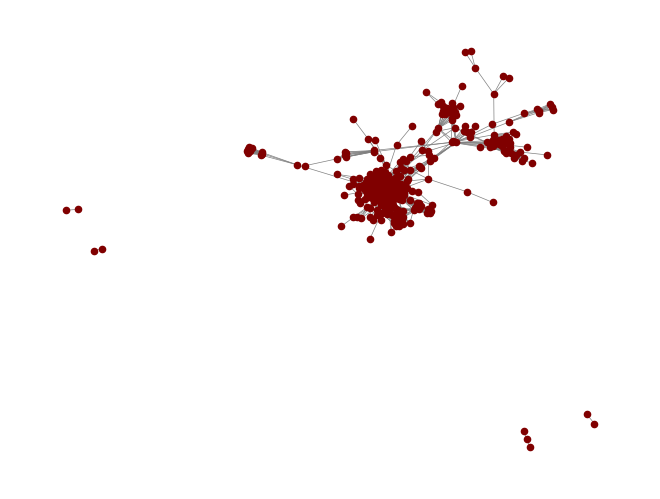

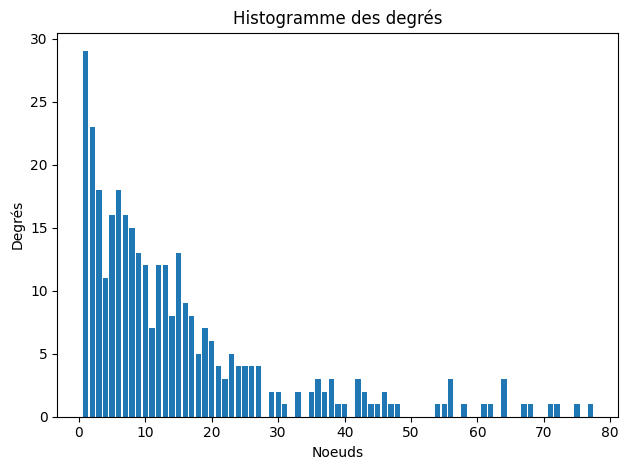

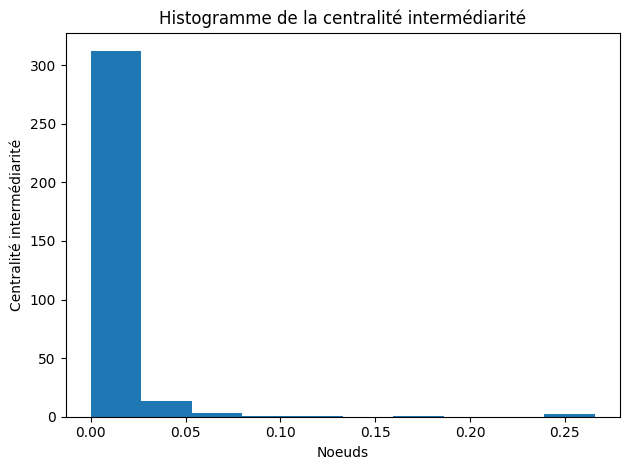

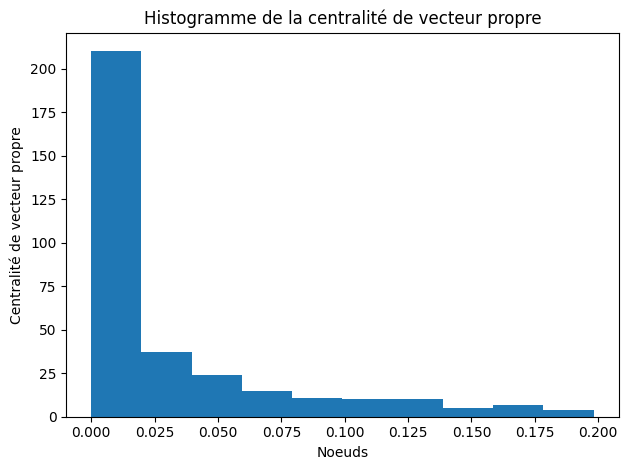

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  2519
Nombre d'Arêtes :  333
Nombre de Composantes Connexes :  5
Taille de la Plus Grande Composante Connexe :  324


In [ ]:
explore_and_summarize_network(edgelist = G.edges(), vertices=G.nodes(), subgraph=None)

In [ ]:
circles = read_circles("/content/facebook/0.circles")


 CIRCLE0 



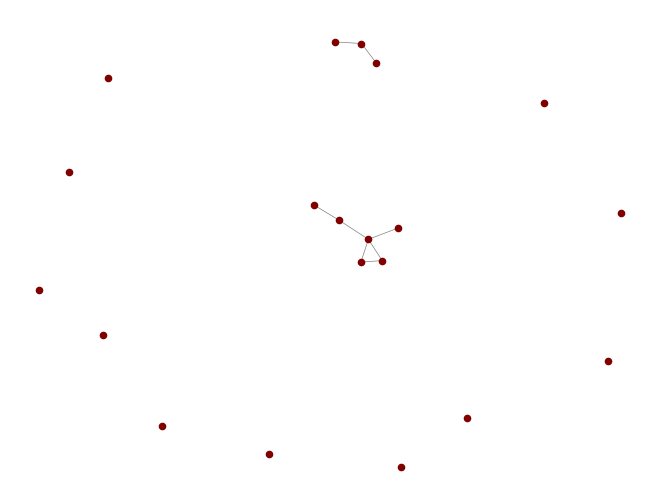

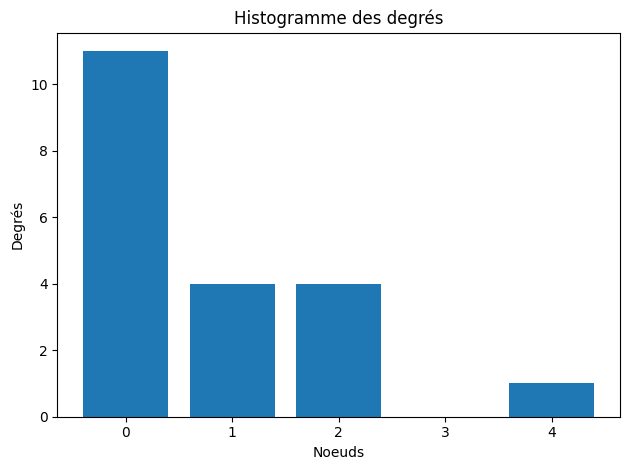

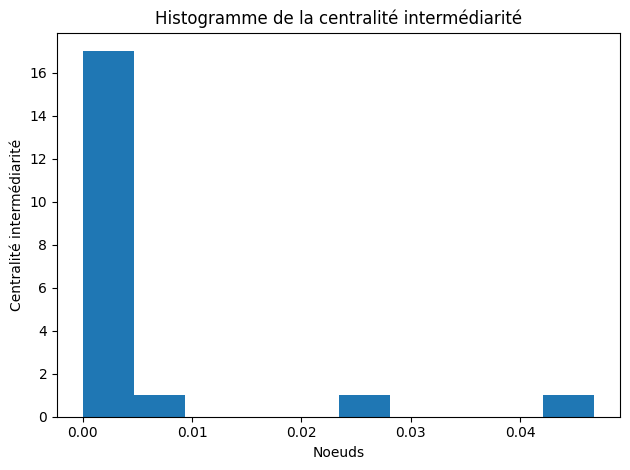

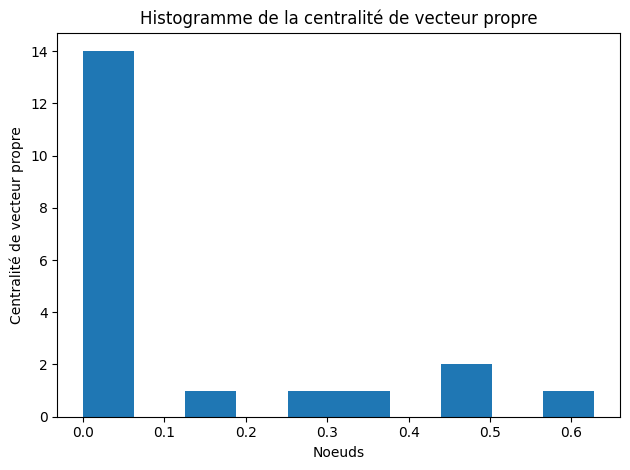

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  8
Nombre d'Arêtes :  20
Nombre de Composantes Connexes :  13
Taille de la Plus Grande Composante Connexe :  6

 CIRCLE1 



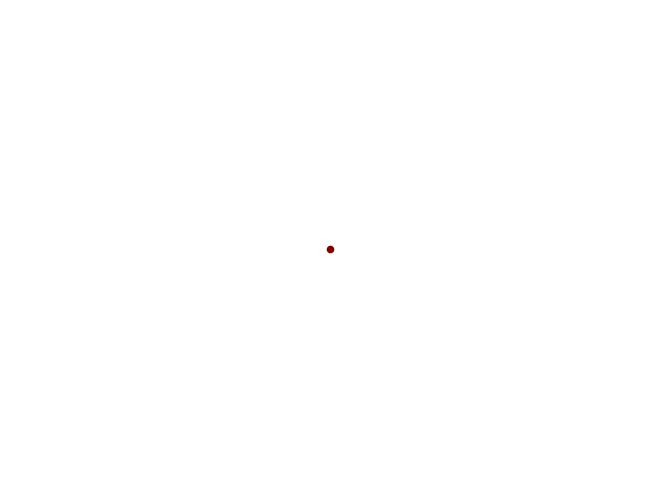

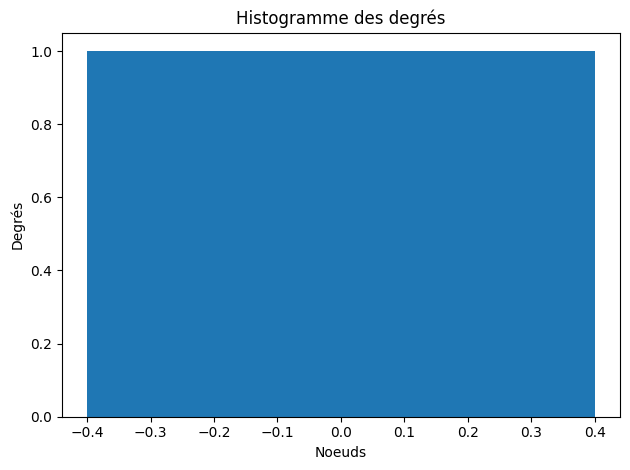

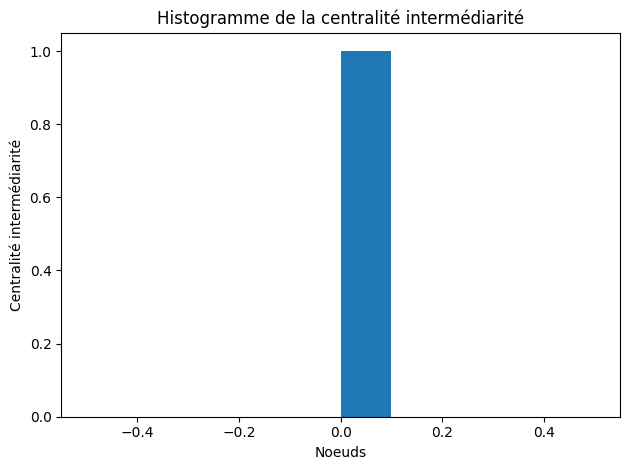

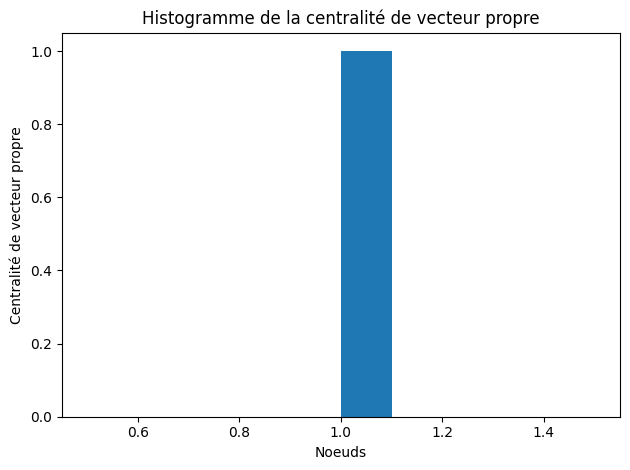

##### Résumés Globaux #####
Diamètre :  0
Nombre de Nœuds :  0
Nombre d'Arêtes :  1
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE2 



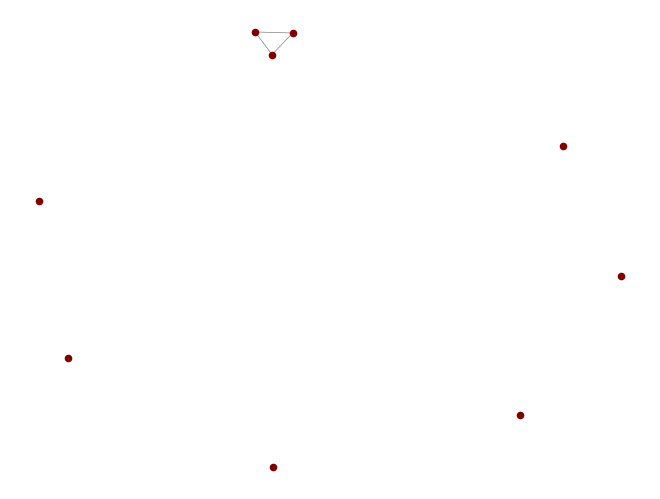

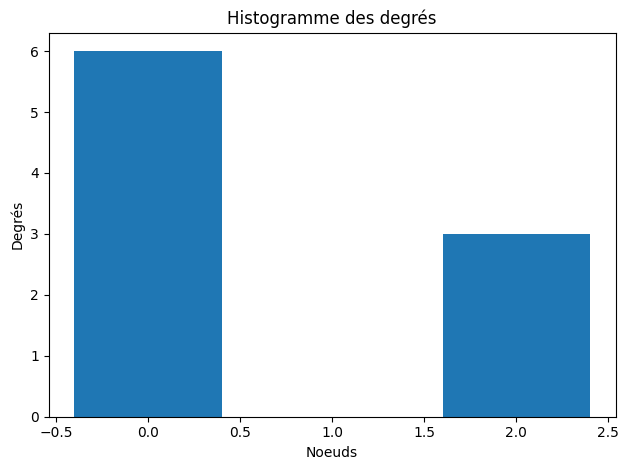

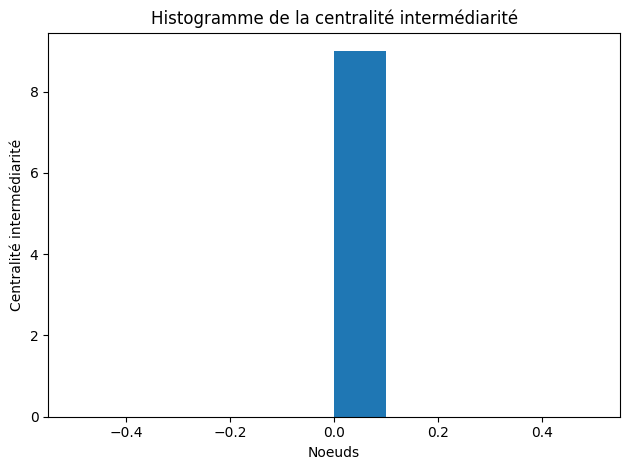

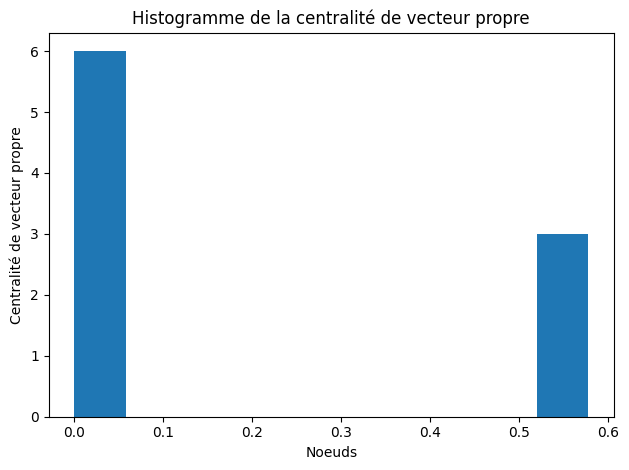

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  3
Nombre d'Arêtes :  9
Nombre de Composantes Connexes :  7
Taille de la Plus Grande Composante Connexe :  3

 CIRCLE3 



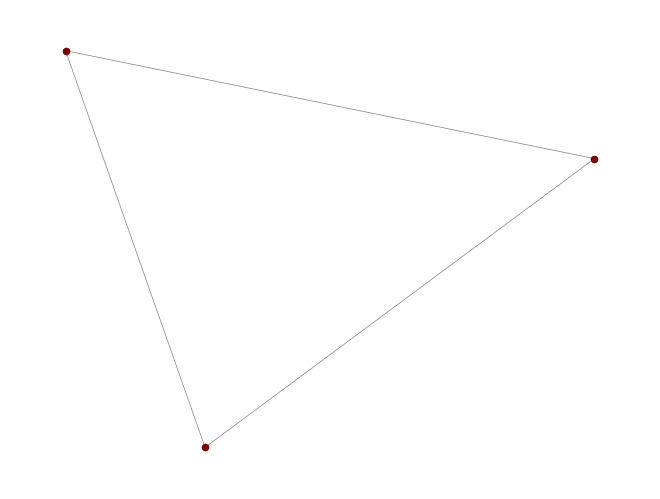

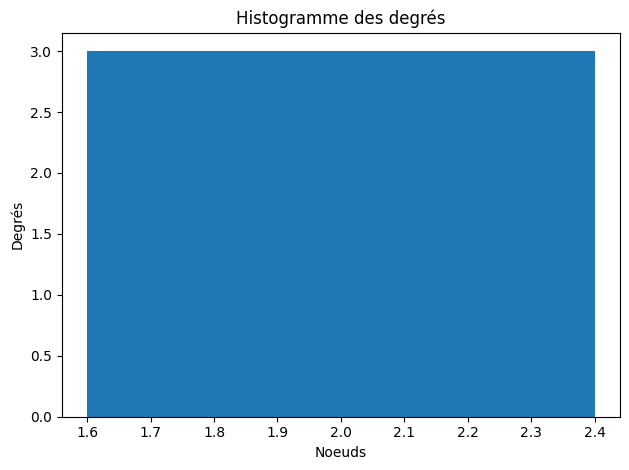

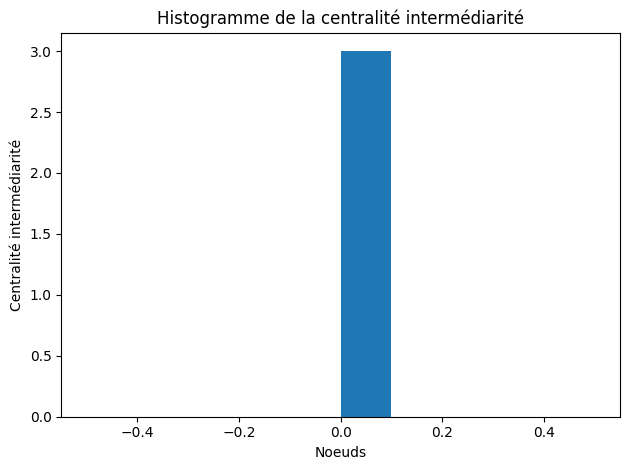

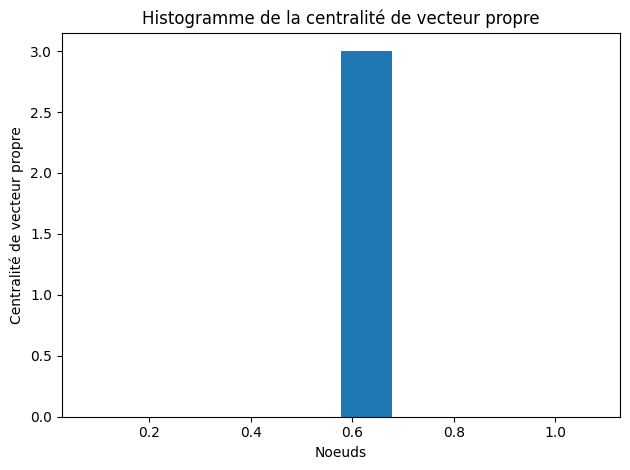

##### Résumés Globaux #####
Diamètre :  1
Nombre de Nœuds :  3
Nombre d'Arêtes :  3
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  3

 CIRCLE4 



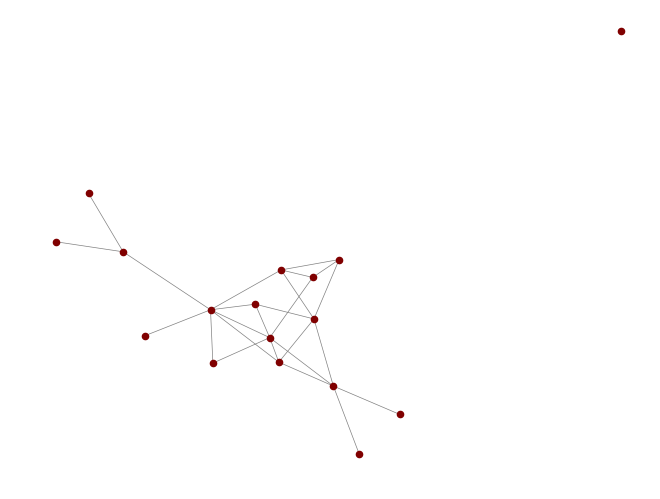

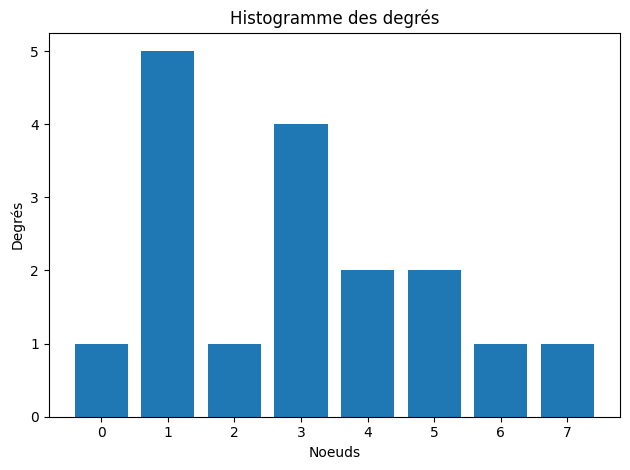

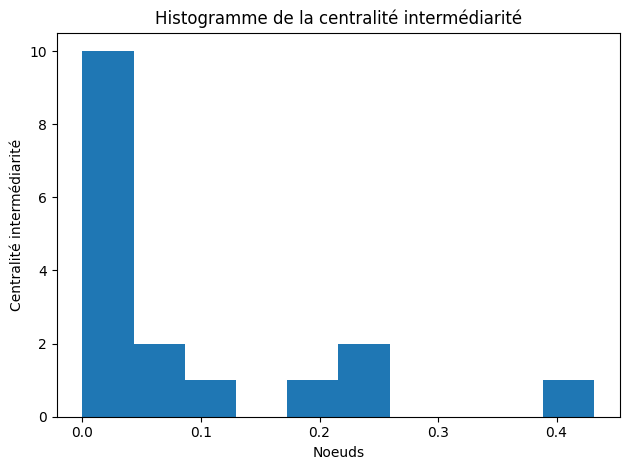

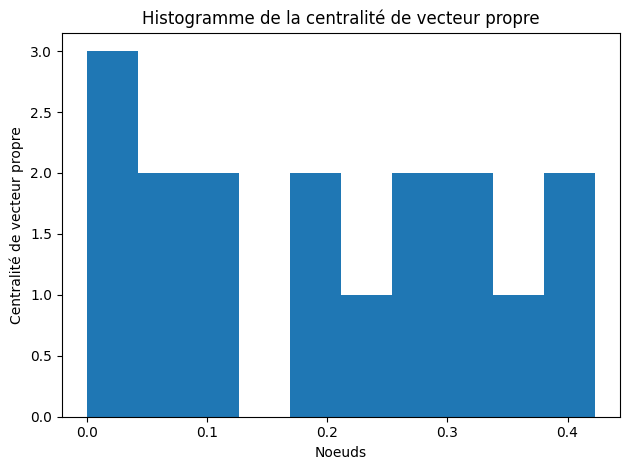

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  25
Nombre d'Arêtes :  17
Nombre de Composantes Connexes :  2
Taille de la Plus Grande Composante Connexe :  16

 CIRCLE5 



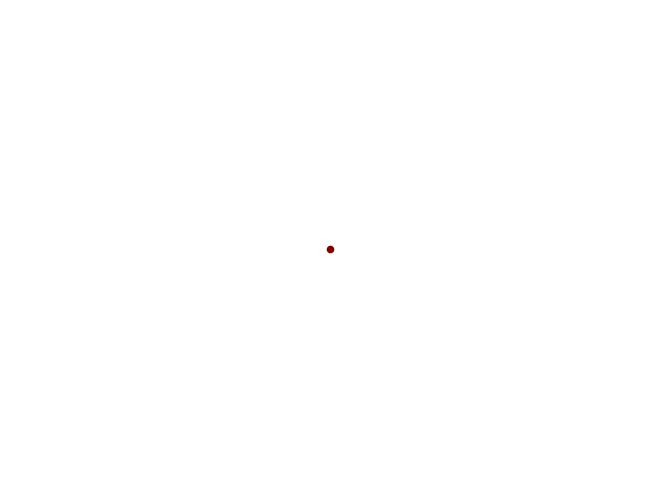

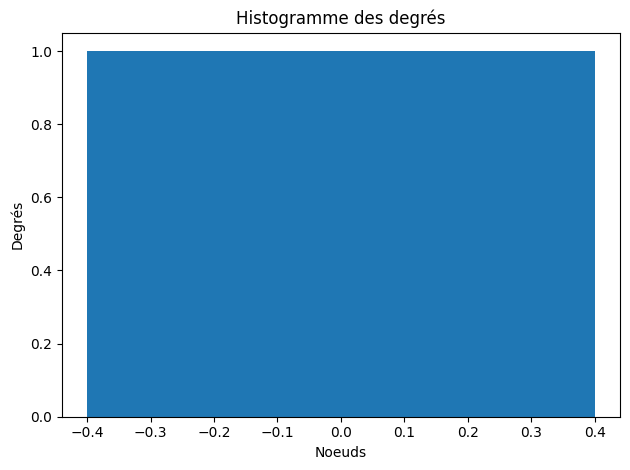

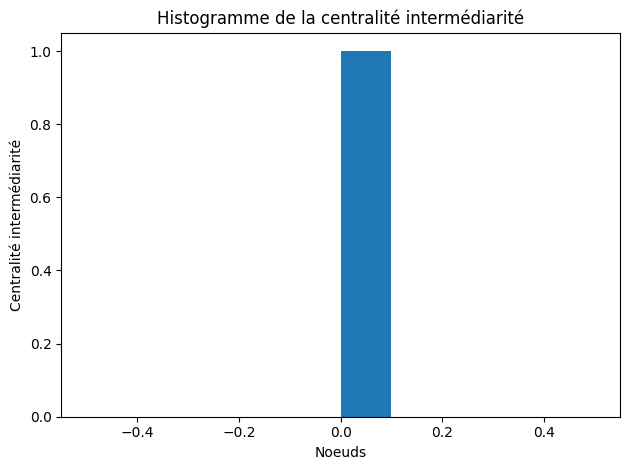

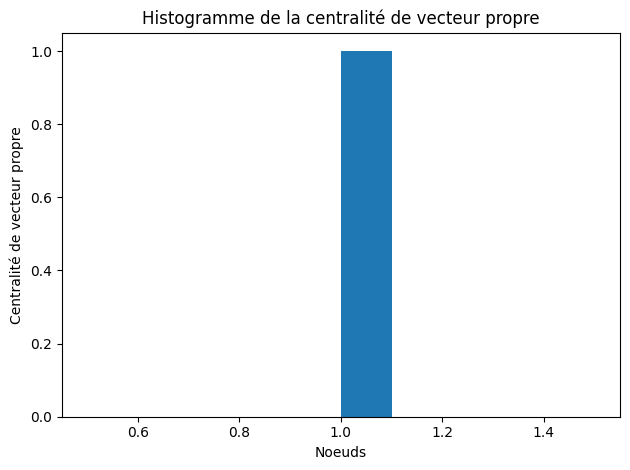

##### Résumés Globaux #####
Diamètre :  0
Nombre de Nœuds :  0
Nombre d'Arêtes :  1
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE6 



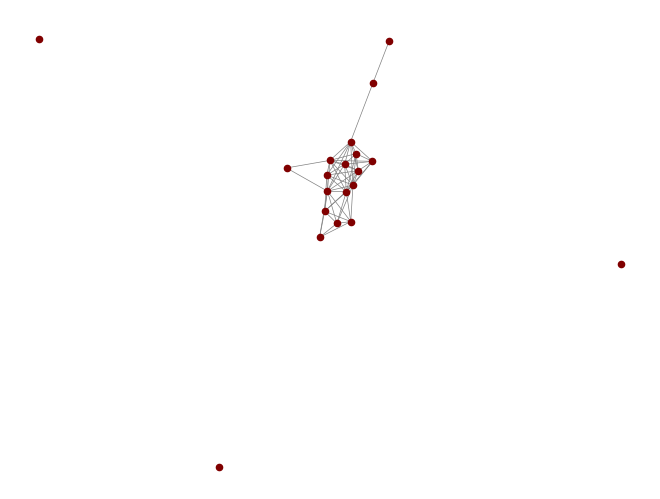

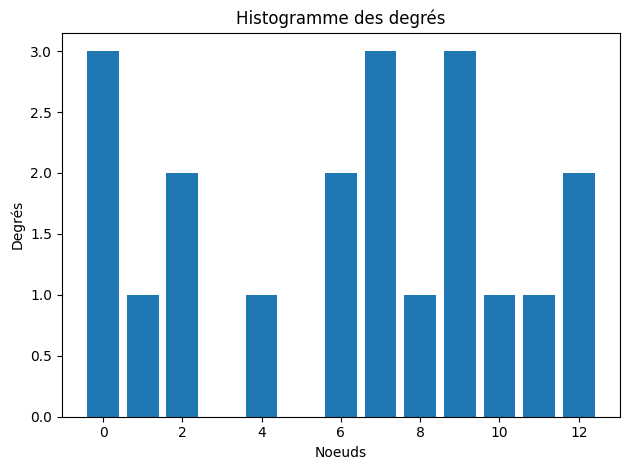

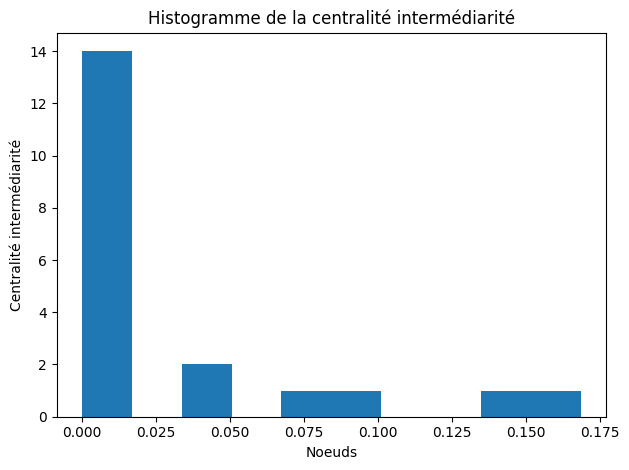

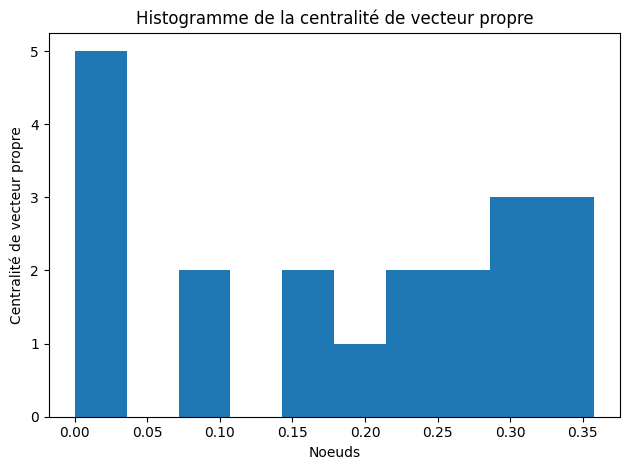

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  61
Nombre d'Arêtes :  20
Nombre de Composantes Connexes :  4
Taille de la Plus Grande Composante Connexe :  17

 CIRCLE7 



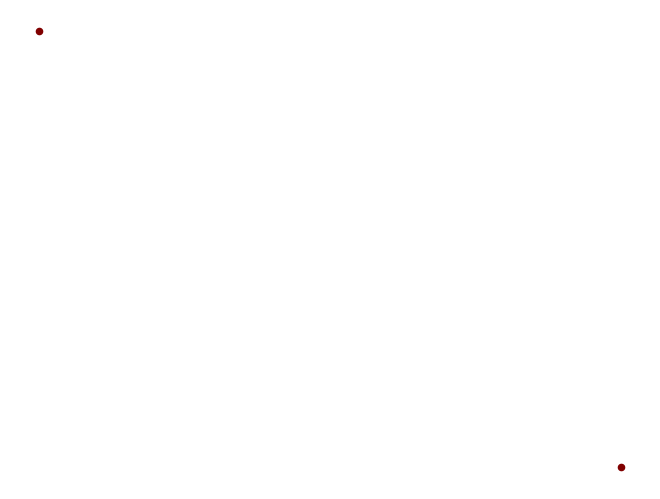

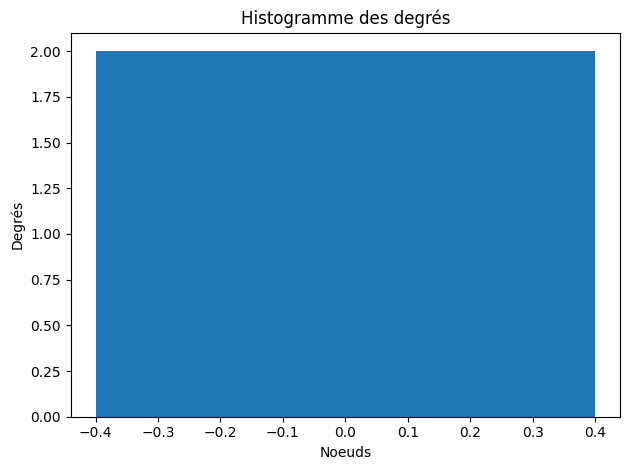

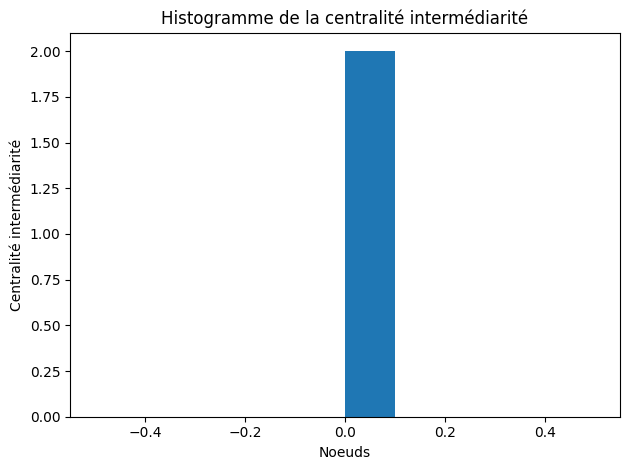

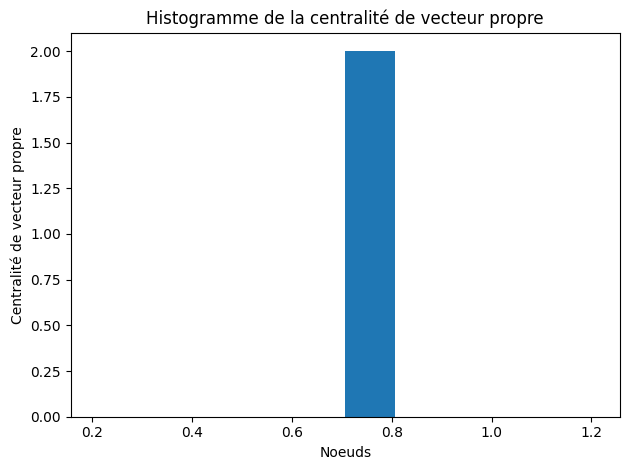

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  0
Nombre d'Arêtes :  2
Nombre de Composantes Connexes :  2
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE8 



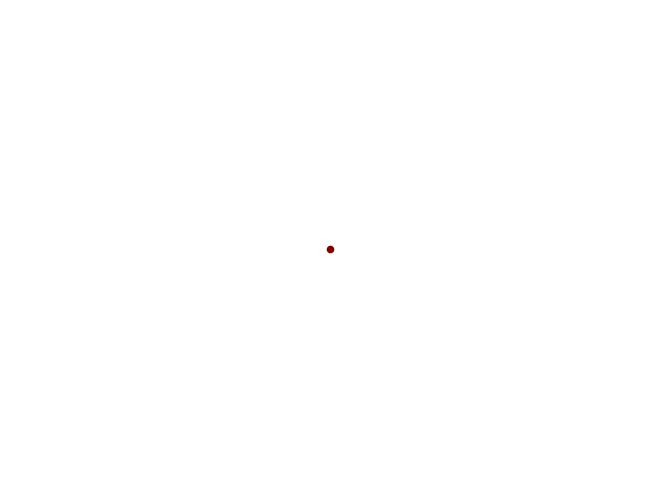

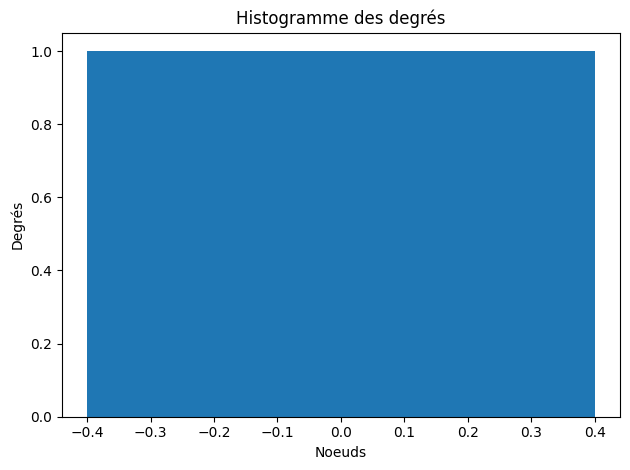

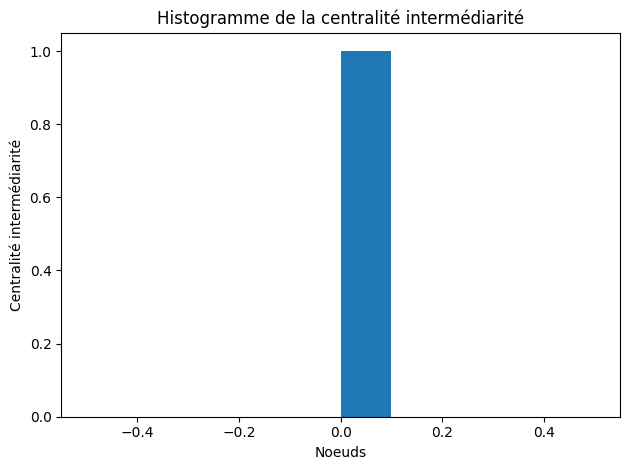

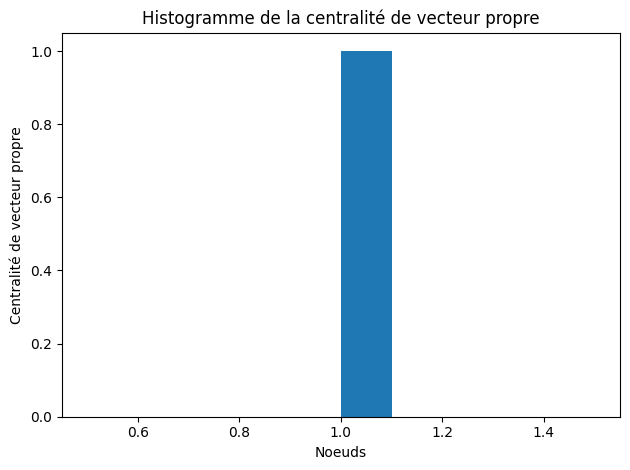

##### Résumés Globaux #####
Diamètre :  0
Nombre de Nœuds :  0
Nombre d'Arêtes :  1
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE9 



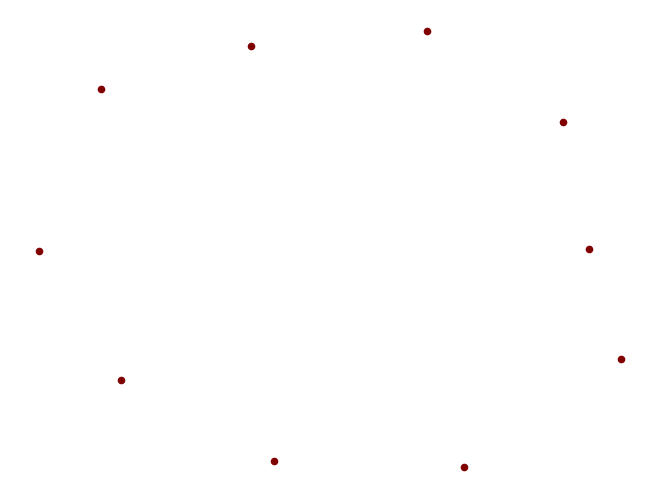

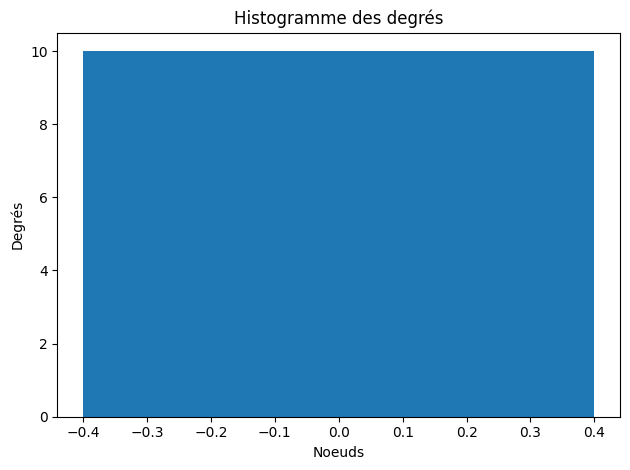

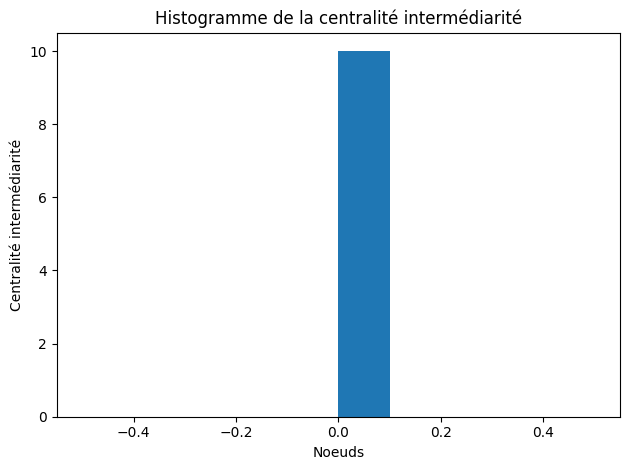

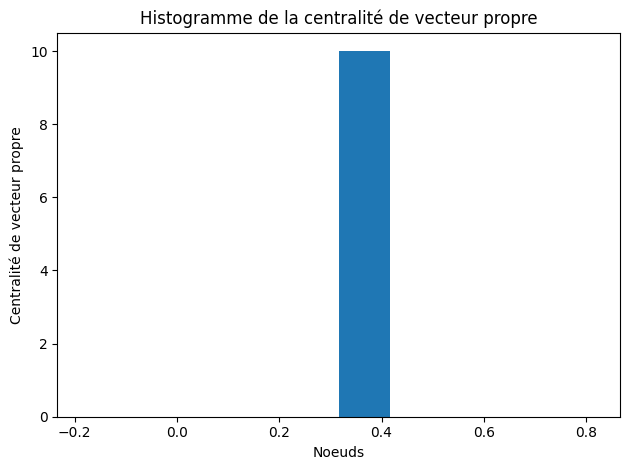

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  0
Nombre d'Arêtes :  10
Nombre de Composantes Connexes :  10
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE10 



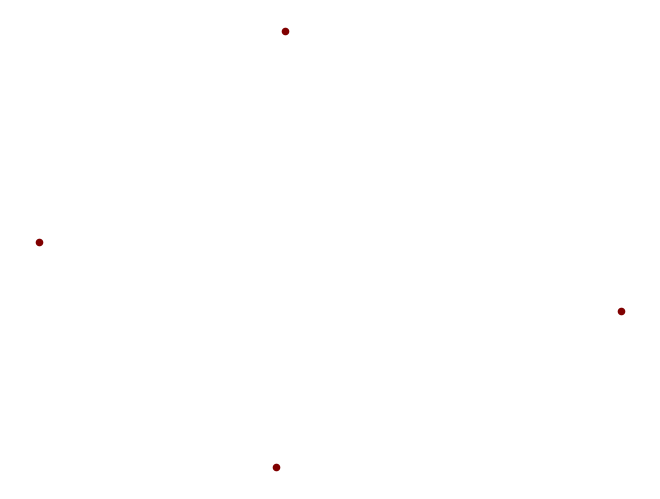

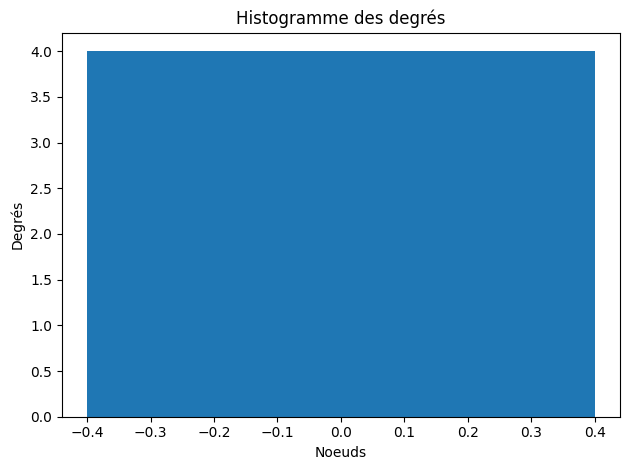

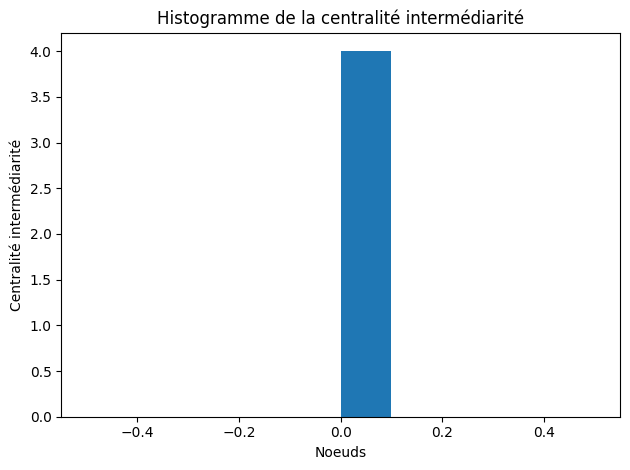

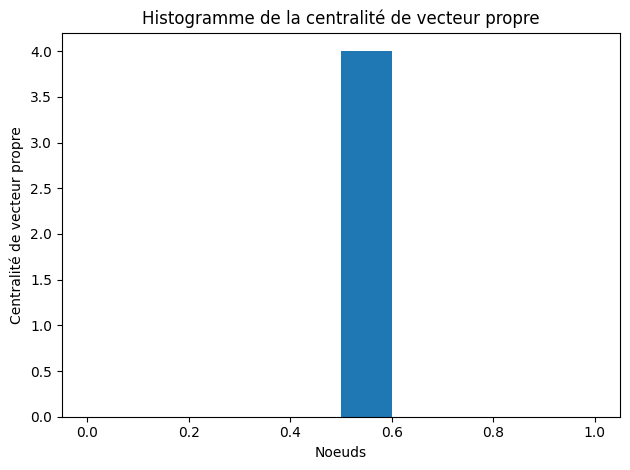

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  0
Nombre d'Arêtes :  4
Nombre de Composantes Connexes :  4
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE11 



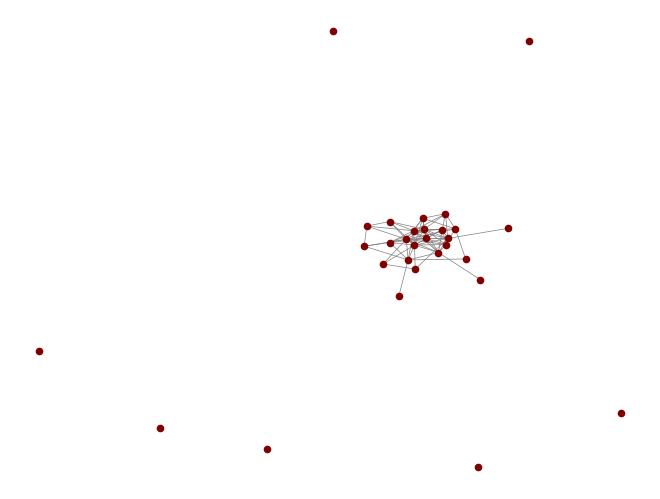

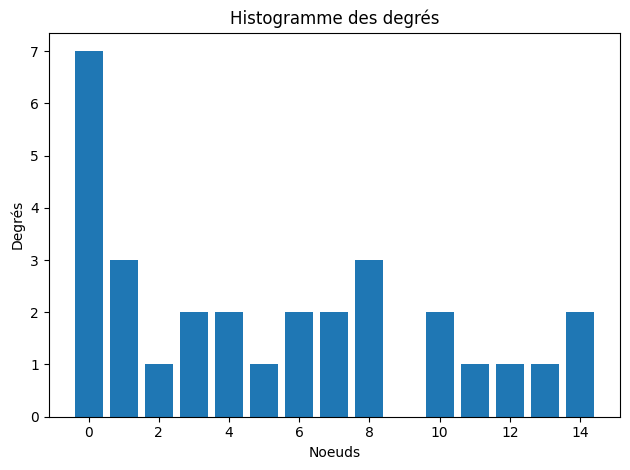

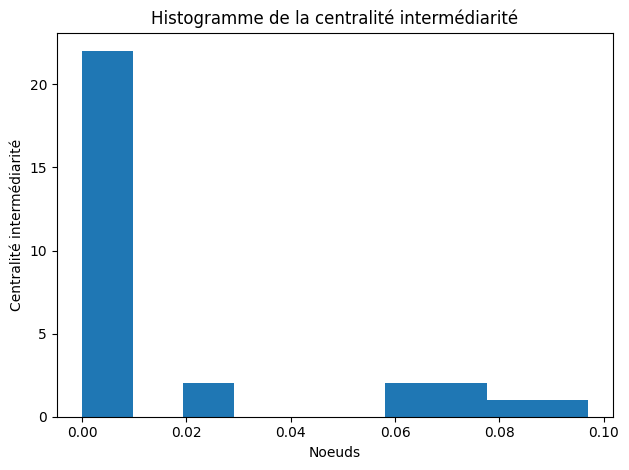

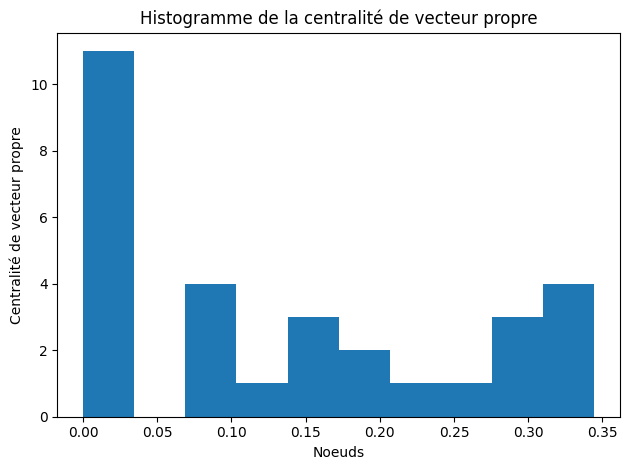

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  79
Nombre d'Arêtes :  30
Nombre de Composantes Connexes :  8
Taille de la Plus Grande Composante Connexe :  23

 CIRCLE12 



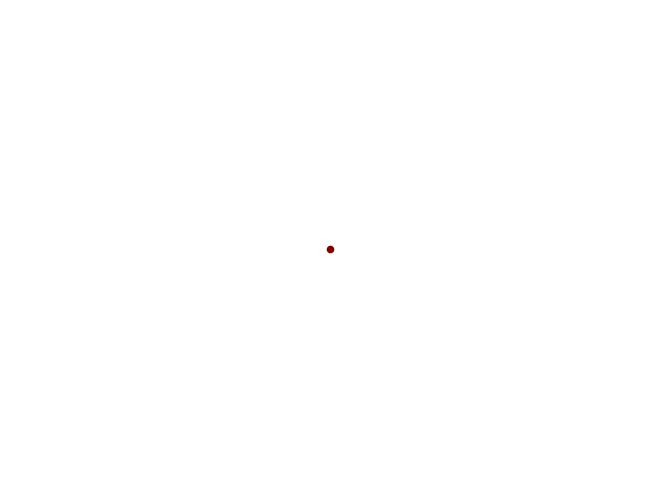

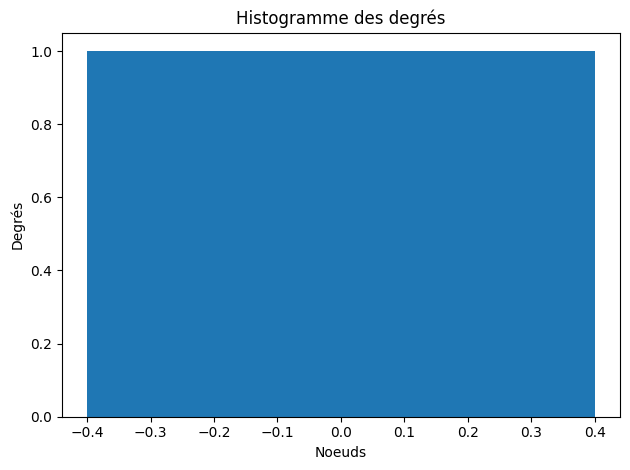

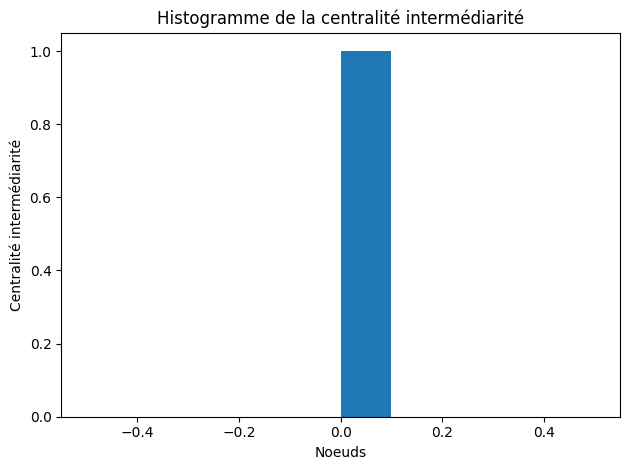

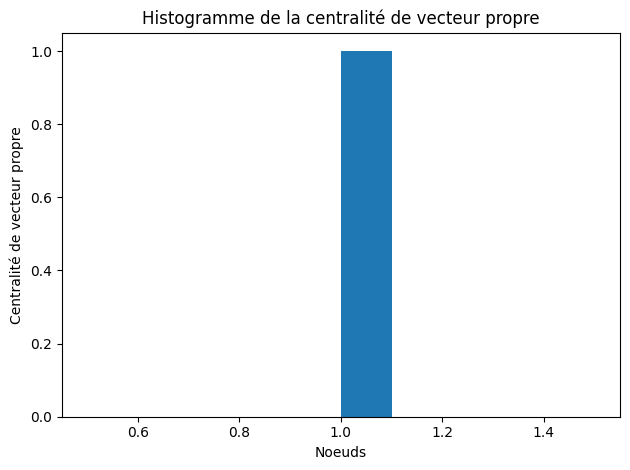

##### Résumés Globaux #####
Diamètre :  0
Nombre de Nœuds :  0
Nombre d'Arêtes :  1
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE13 



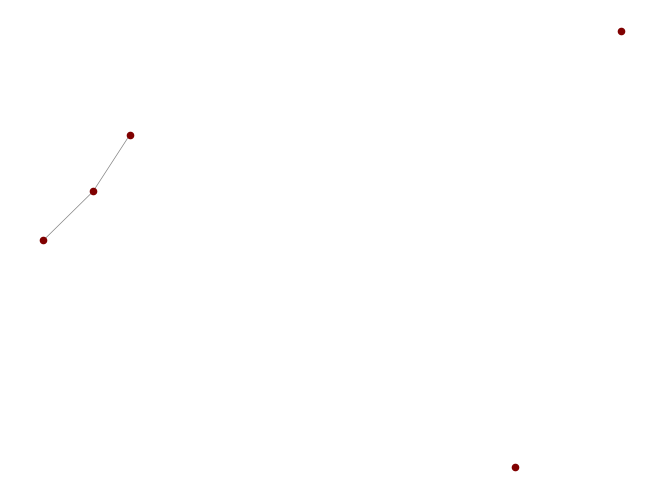

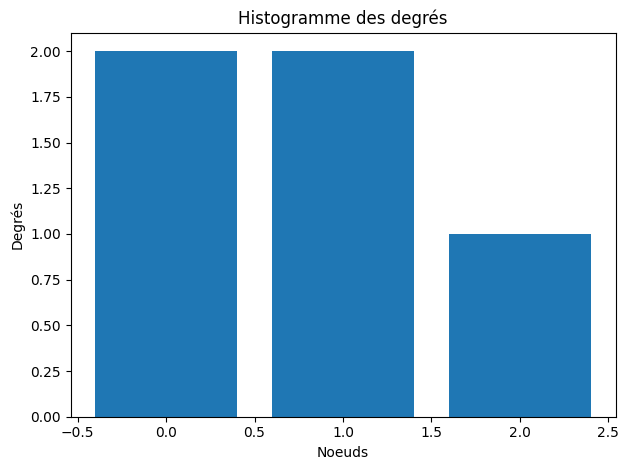

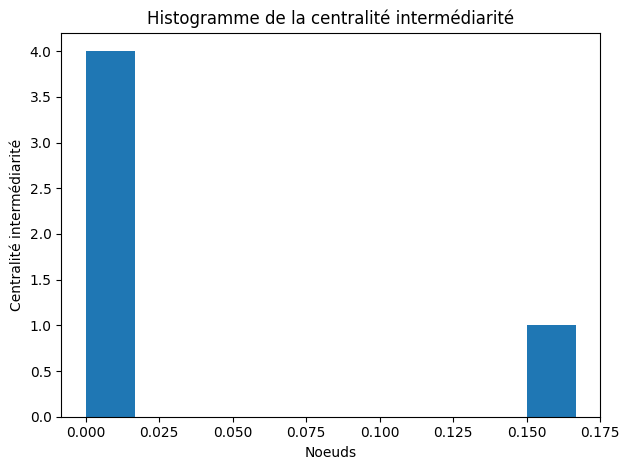

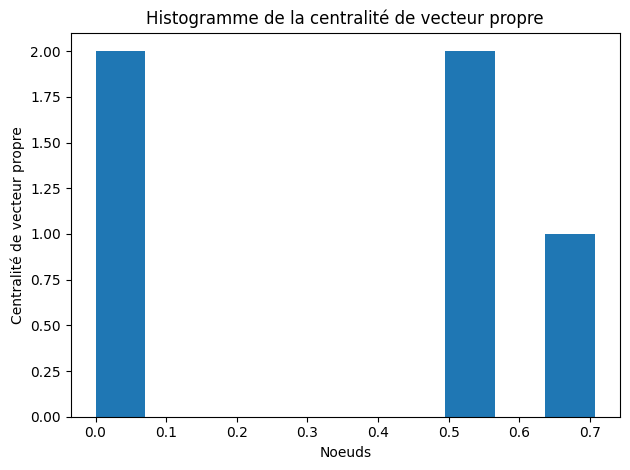

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  2
Nombre d'Arêtes :  5
Nombre de Composantes Connexes :  3
Taille de la Plus Grande Composante Connexe :  3

 CIRCLE14 



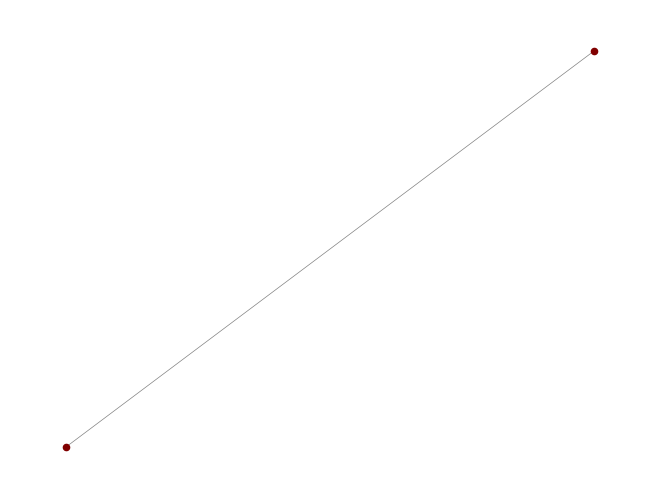

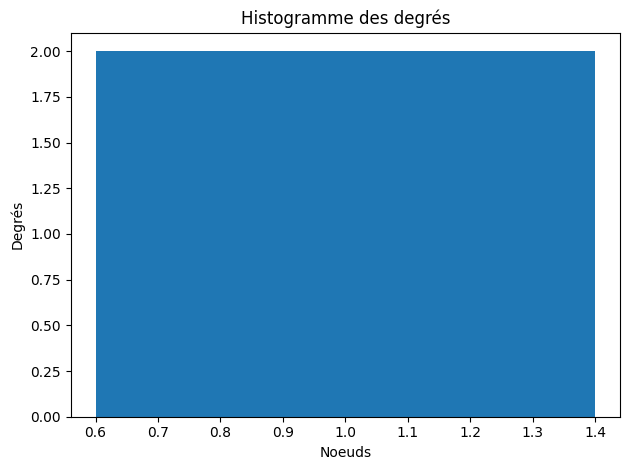

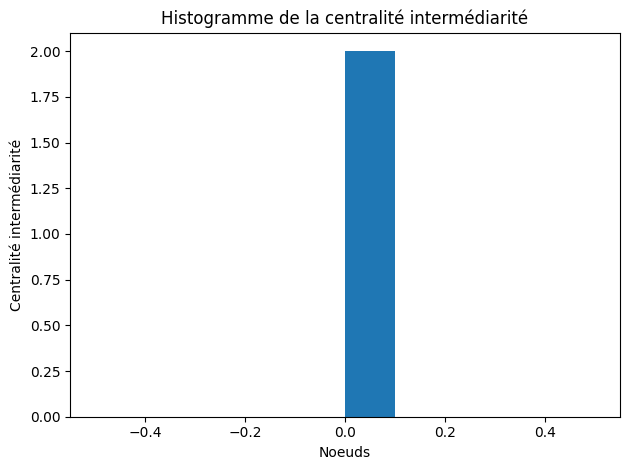

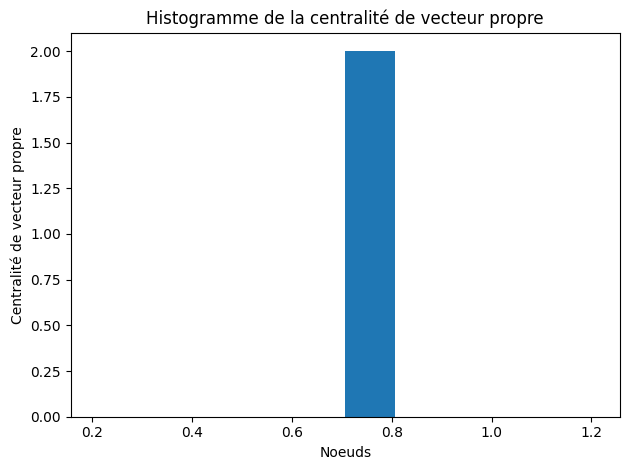

##### Résumés Globaux #####
Diamètre :  1
Nombre de Nœuds :  1
Nombre d'Arêtes :  2
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  2

 CIRCLE15 



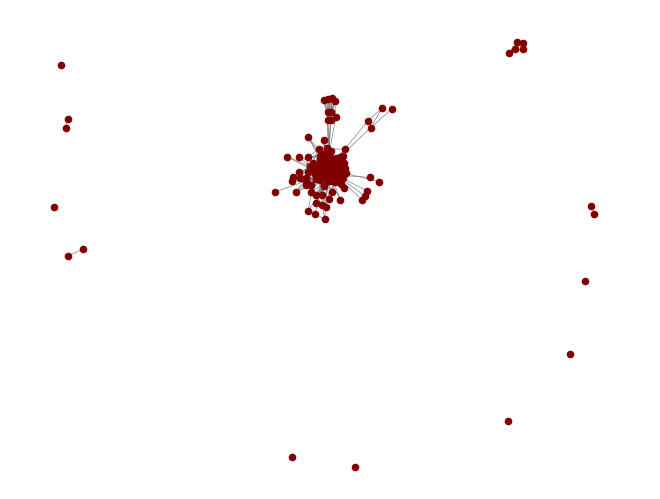

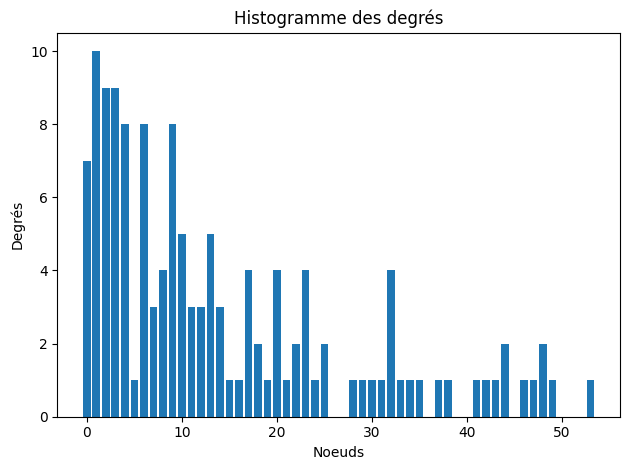

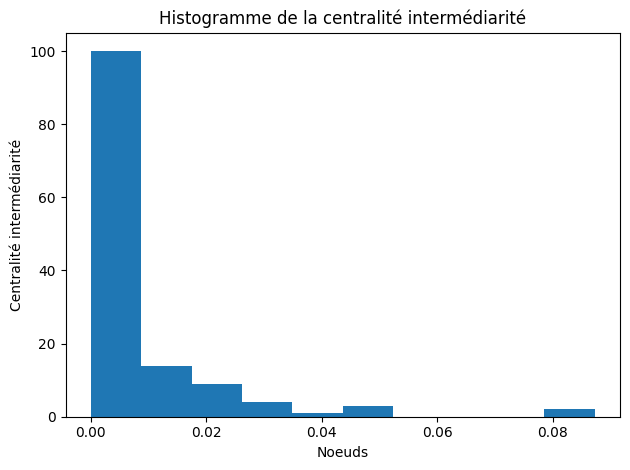

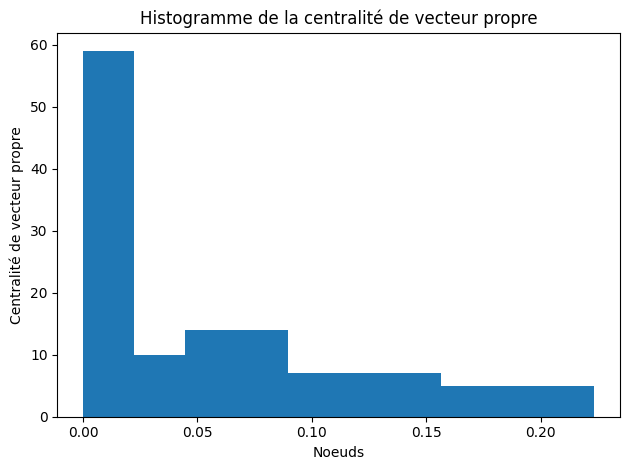

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  942
Nombre d'Arêtes :  133
Nombre de Composantes Connexes :  12
Taille de la Plus Grande Composante Connexe :  115

 CIRCLE16 



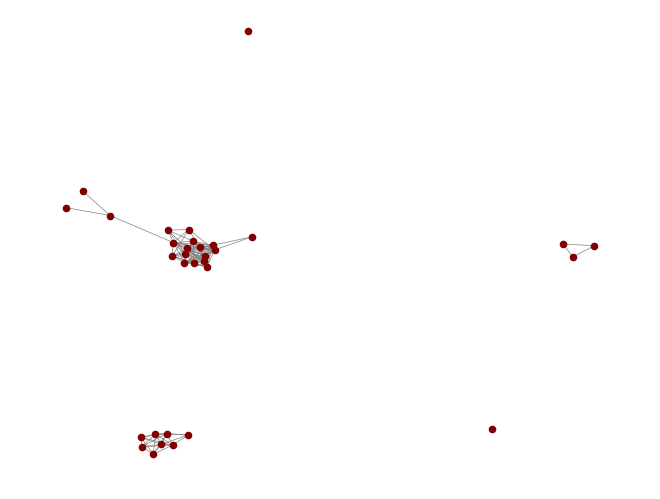

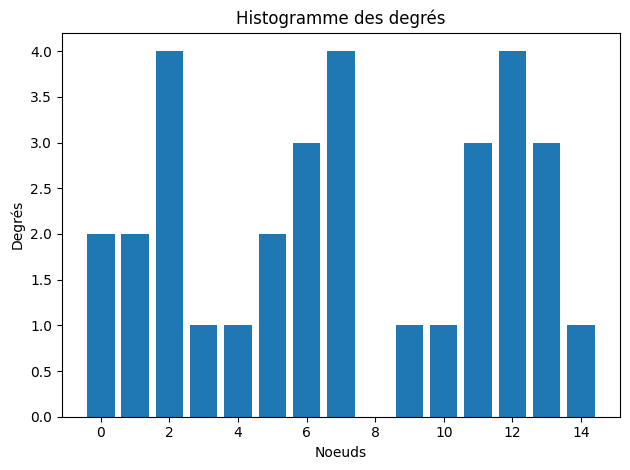

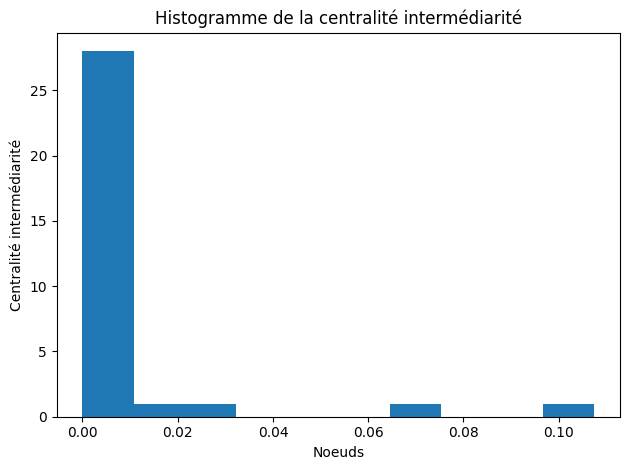

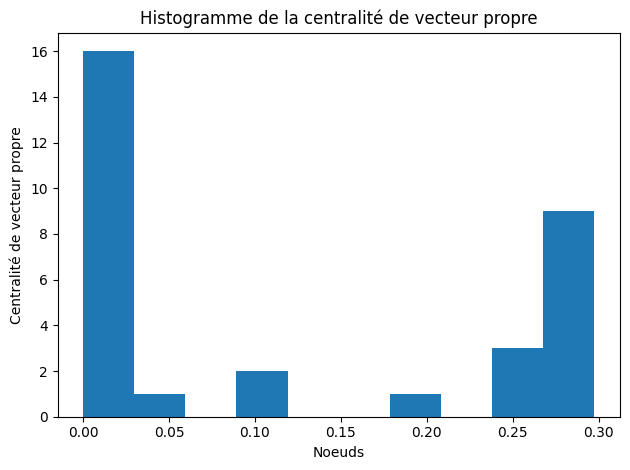

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  113
Nombre d'Arêtes :  32
Nombre de Composantes Connexes :  5
Taille de la Plus Grande Composante Connexe :  19

 CIRCLE17 



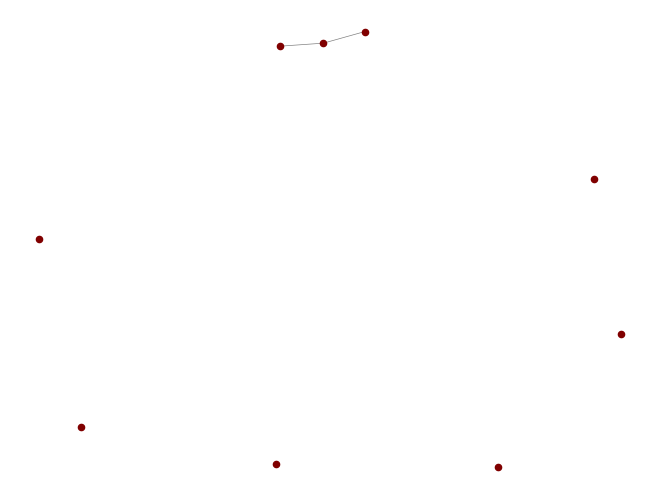

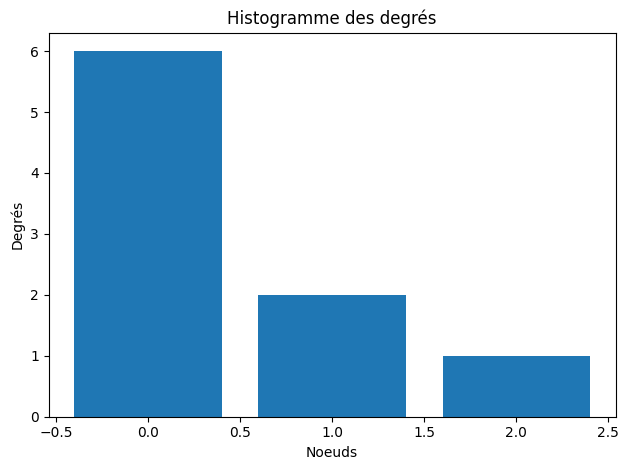

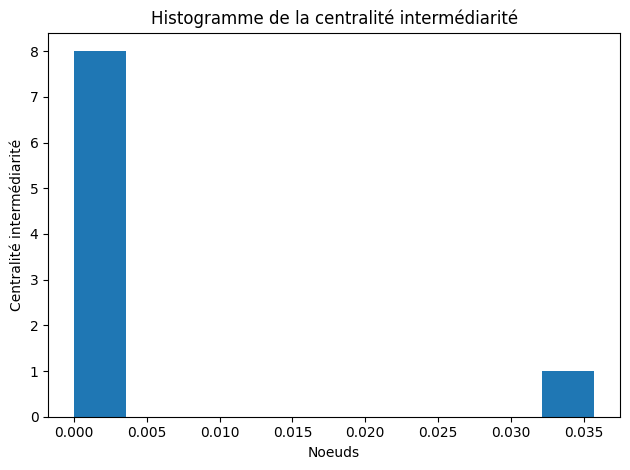

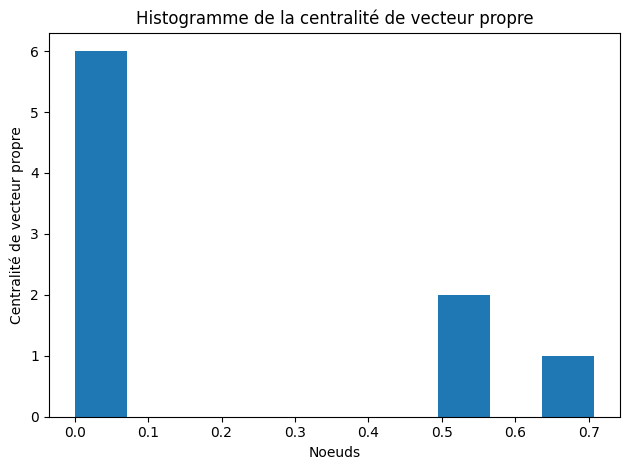

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  2
Nombre d'Arêtes :  9
Nombre de Composantes Connexes :  7
Taille de la Plus Grande Composante Connexe :  3

 CIRCLE18 



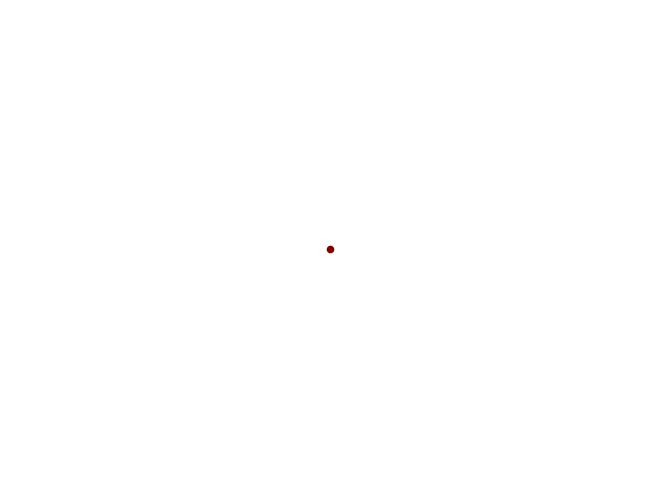

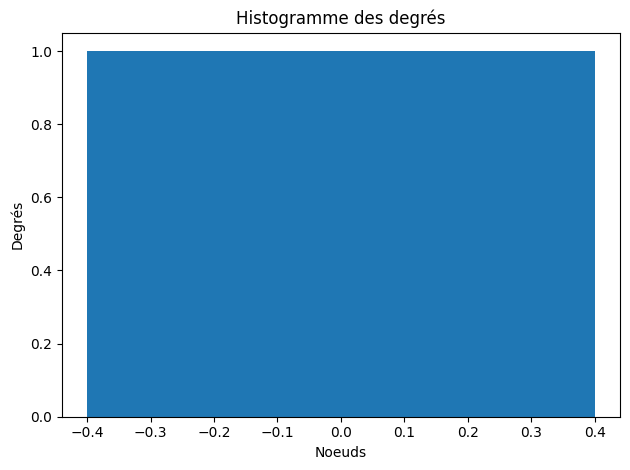

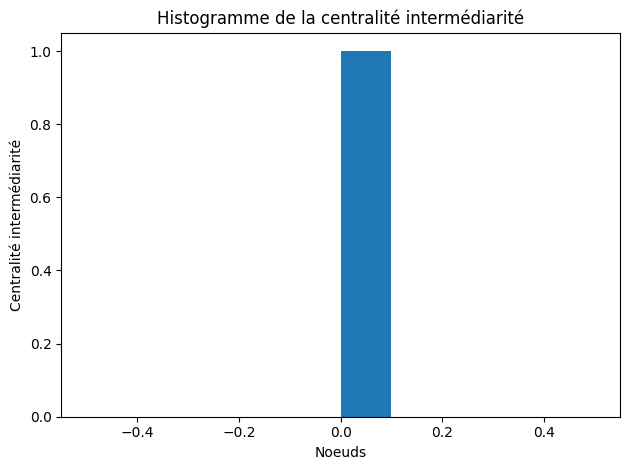

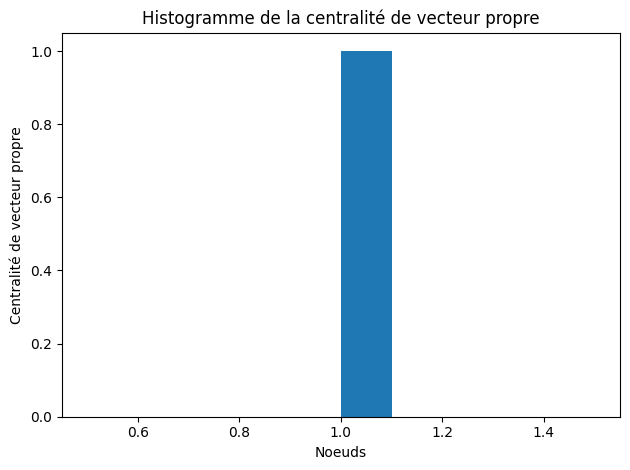

##### Résumés Globaux #####
Diamètre :  0
Nombre de Nœuds :  0
Nombre d'Arêtes :  1
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE19 



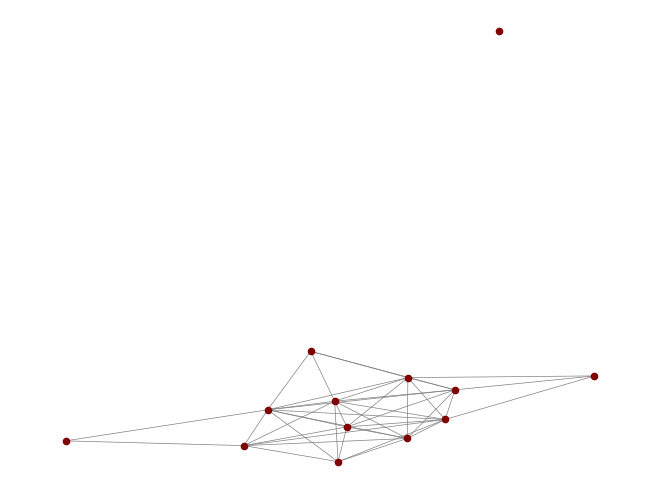

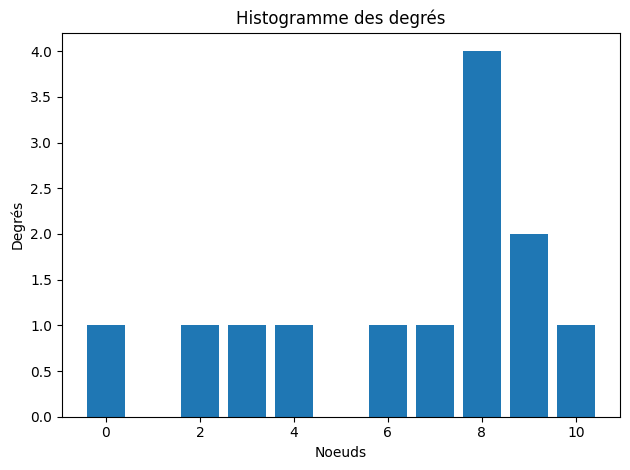

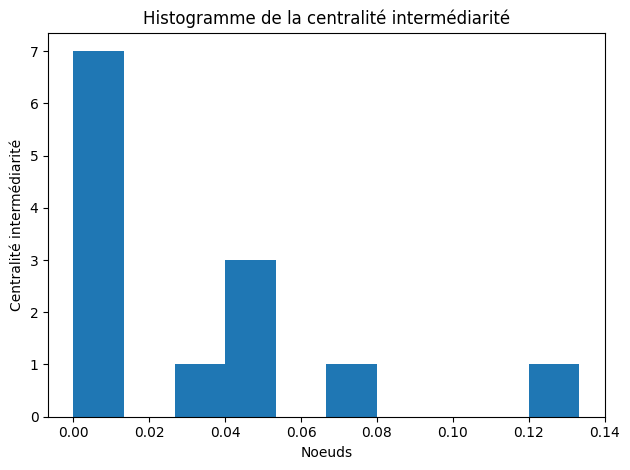

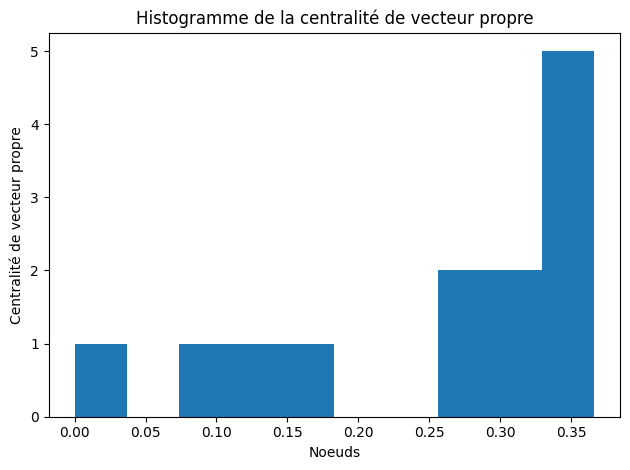

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  41
Nombre d'Arêtes :  13
Nombre de Composantes Connexes :  2
Taille de la Plus Grande Composante Connexe :  12

 CIRCLE20 



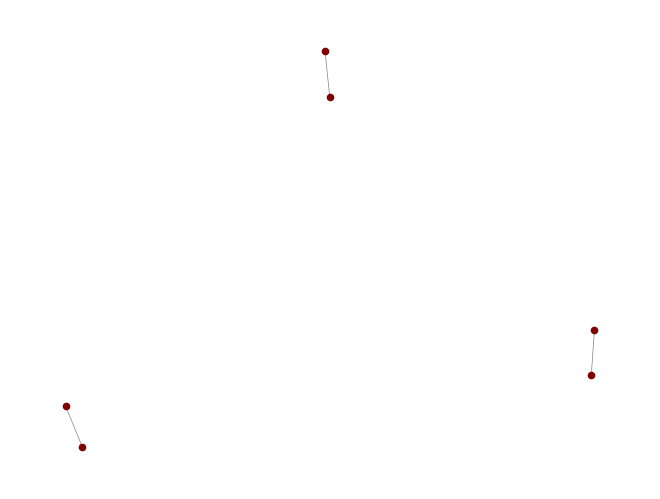

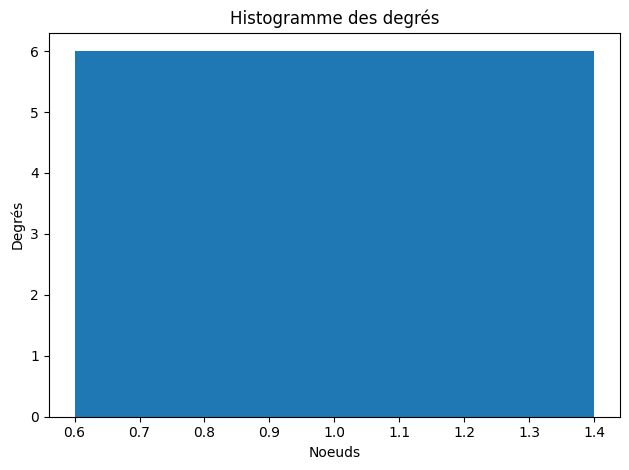

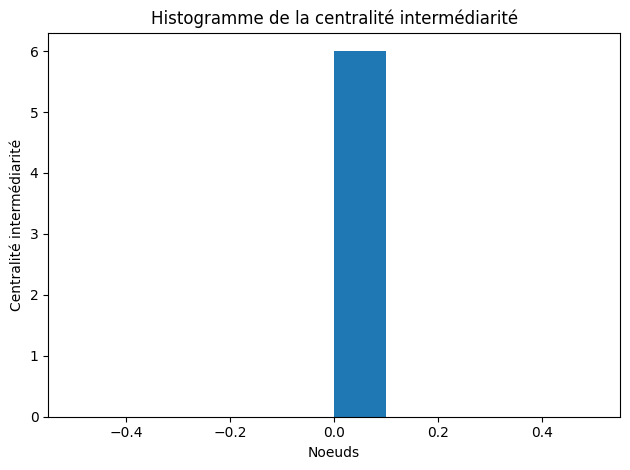

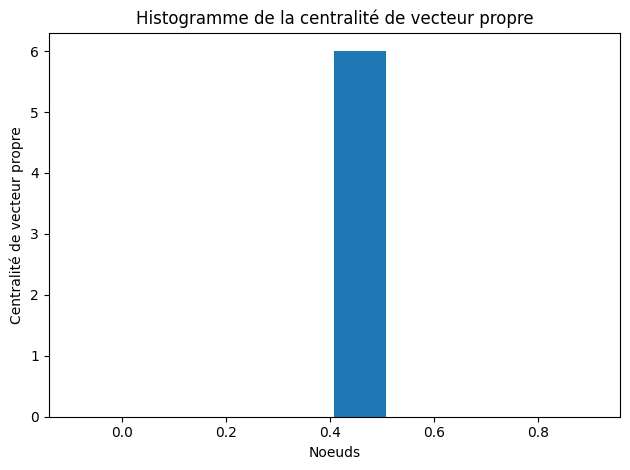

##### Résumés Globaux #####
Diamètre :  Found infinite path length because the graph is not connected!
Nombre de Nœuds :  3
Nombre d'Arêtes :  6
Nombre de Composantes Connexes :  3
Taille de la Plus Grande Composante Connexe :  2

 CIRCLE21 



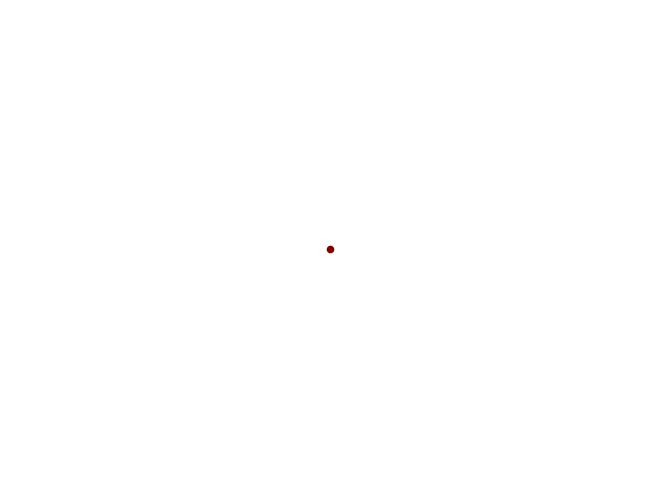

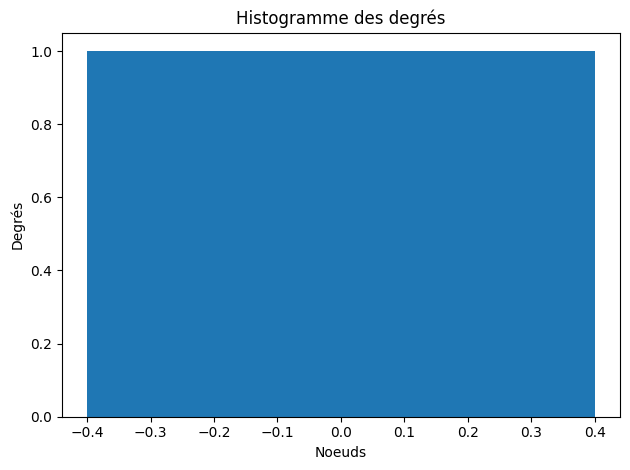

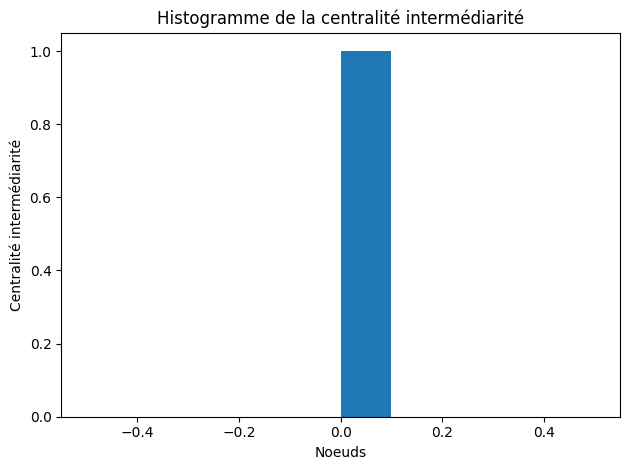

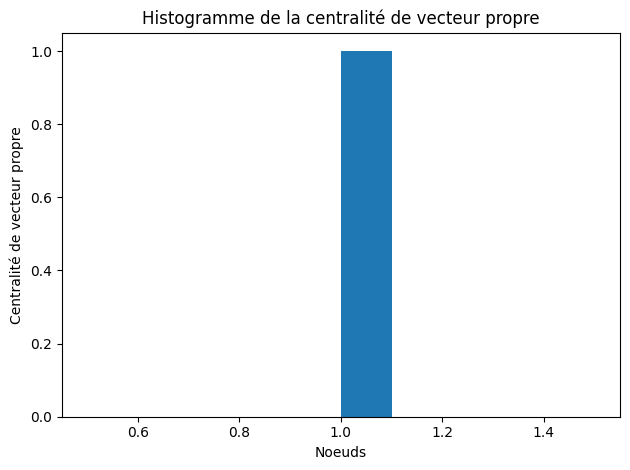

##### Résumés Globaux #####
Diamètre :  0
Nombre de Nœuds :  0
Nombre d'Arêtes :  1
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE22 



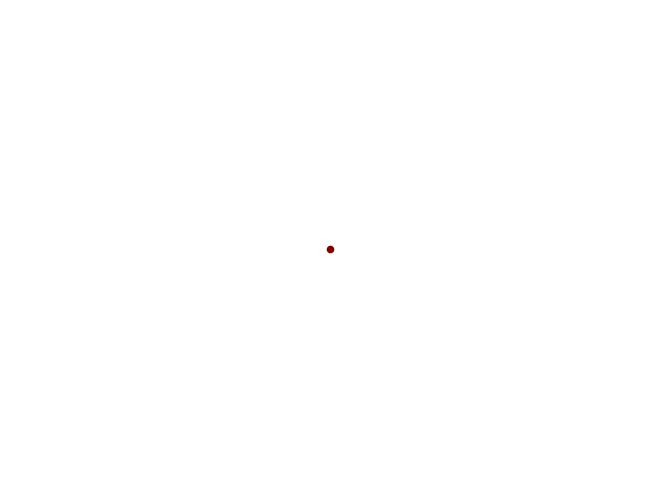

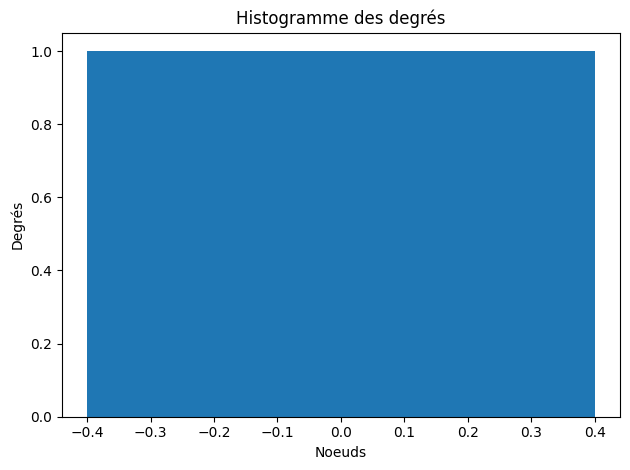

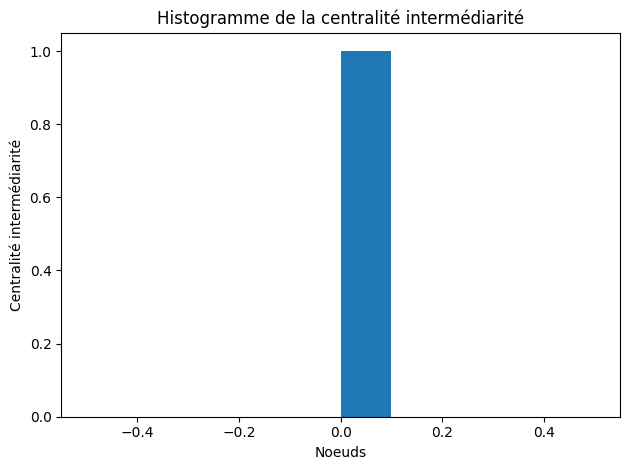

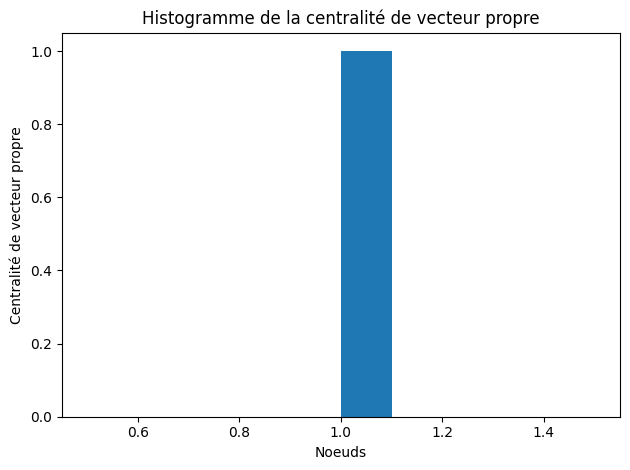

##### Résumés Globaux #####
Diamètre :  0
Nombre de Nœuds :  0
Nombre d'Arêtes :  1
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  1

 CIRCLE23 



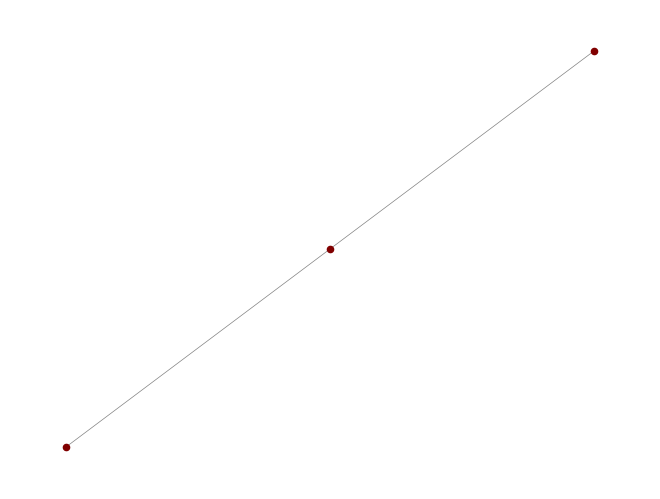

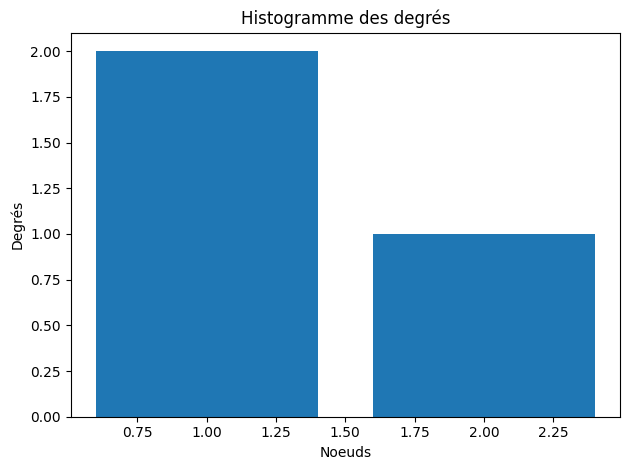

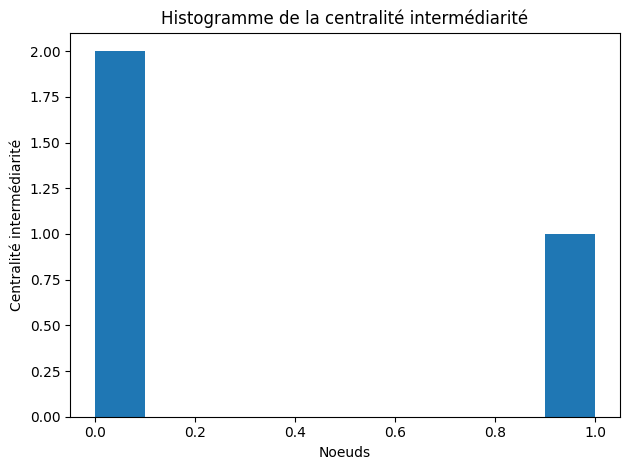

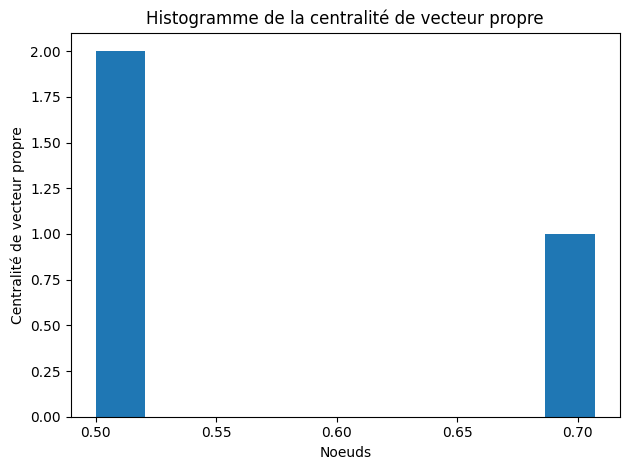

##### Résumés Globaux #####
Diamètre :  2
Nombre de Nœuds :  2
Nombre d'Arêtes :  3
Nombre de Composantes Connexes :  1
Taille de la Plus Grande Composante Connexe :  3


In [ ]:
for c in circles:
    print("\n",c.upper(),"\n")
    explore_and_summarize_network(edgelist = list(G.edges()), vertices=list(G.nodes()), subgraph=circles[c])

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G1 =nx.read_edgelist("/content/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

# Link Prediction using DGL

In [ ]:
# install DGL in Colab
!pip install dgl -f https://data.dgl.ai/wheels/repo.html

Looking in links: https://data.dgl.ai/wheels/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 21.9 MB/s eta 0:00:00


In [ ]:
!pip install dgl


In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np               # Importation de la bibliothèque NumPy pour les opérations numériques
import torch                    # Importation de la bibliothèque PyTorch pour l'apprentissage automatique
import torch.nn as nn           # Importation de la bibliothèque PyTorch pour les couches de réseau neuronal
import torch.nn.functional as F # Importation de la bibliothèque PyTorch pour les fonctions d'activation
import itertools                # Importation de la bibliothèque itertools pour la manipulation d'itérateurs
import scipy.sparse as sp       # Importation de la bibliothèque SciPy pour les opérations sur les matrices creuses
import dgl                      # Importation de la bibliothèque DGL (Deep Graph Library) pour le traitement des graphes



Pour procéder aux recommandations d'amis, nous devons d'abord charger les connexions d'amitié (arêtes) dans le graphe. De plus, les fichiers contiennent des informations sur les caractéristiques des utilisateurs représentées par un vecteur de 224 dimensions composé de 0 et de 1, que nous chargerons également. Dans le but de simplifier le problème, nous nous concentrerons uniquement sur un seul réseau ego, en l'occurrence le réseau appartenant à l'Utilisateur 0.

In [ ]:
# user id, which correspond to file name prefix
USER = 0

# Définition des chemins des fichiers d'arêtes et des caractéristiques des utilisateurs
file_edges = f'facebook/{USER}.edges'  # Chemin du fichier d'arêtes
file_feat = f'facebook/{USER}.feat'    # Chemin du fichier de caractéristiques

# Initialisation des listes pour les arêtes du graphe
edges_u, edges_v = [], []

# Ouverture du fichier d'arêtes pour chargement
with open(file_edges) as f:
    for line in f:
        e1, e2 = tuple(int(x) - 1 for x in line.split())  # Lecture des arêtes et conversion en indices 0-based
        edges_u.append(e1)  # Ajout de l'indice du premier nœud de l'arête
        edges_v.append(e2)  # Ajout de l'indice du deuxième nœud de l'arête

edges_u, edges_v = np.array(edges_u), np.array(edges_v)  # Conversion des listes en tableaux NumPy

num_nodes = 0  # Initialise le nombre de nœuds à zéro, suppose que les nœuds sont séquentiels
feats = []     # Initialisation de la liste pour les caractéristiques des nœuds

# Ouverture du fichier de caractéristiques des nœuds pour chargement
with open(file_feat) as f:
    for line in f:
        num_nodes += 1  # Incrémente le nombre de nœuds
        a = [int(x) for x in line.split()[1:]]  # Récupération des caractéristiques du nœud (à partir du deuxième élément)
        feats.append(torch.tensor(a, dtype=torch.float))  # Ajout des caractéristiques sous forme de tenseurs PyTorch

feats = torch.stack(feats)  # Empile les caractéristiques en tant que tenseur PyTorch

g = dgl.graph((edges_u, edges_v))  # Construction du graphe en utilisant les arêtes
g.ndata['feat'] = feats  # Attribution des caractéristiques des nœuds au graphe

g  # Affiche les métadonnées du graphe


Graph(num_nodes=347, num_edges=5038,
      ndata_schemes={'feat': Scheme(shape=(224,), dtype=torch.float32)}
      edata_schemes={})


Métadonnées du graphe résultant
Le graphe a 347 nœuds et 5038 arêtes
 Les données des nœuds comprennent une caractéristique 'feat' avec une forme (shape) de (224,) et un type de données (dtype) de torch.float32
      edata_schemes={})  
Aucune donnée n'est attribuée aux arêtes du graphe


## Training/Test data split

* Après avoir créé le graphe, nous devons le diviser en deux ensembles : l'ensemble d'entraînement et l'ensemble de test. Pour ce faire, nous créons un graphe de "liens négatifs" où toutes les arêtes manquantes dans le graphe d'origine sont représentées comme des arêtes dans le graphe négatif. Cela aide l'algorithme d'entraînement à identifier des exemples négatifs.

* Nous sélectionnons de manière aléatoire 30 % des liens pour des fins de test, tandis que les 70 % restants sont conservés pour l'entraînement. Nous n'utilisons pas d'ensemble de validation pour simplifier le processus.

In [ ]:
# Ratio pour la division de l'ensemble de test
TEST_RATIO = 0.3  # ratio pour diviser l'ensemble de test

# Récupération des arêtes existantes dans le graphe
u, v = g.edges()

# Générer des identifiants pour les arêtes et les mélanger
eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)

# Calculer la taille de l'ensemble de test
test_size = int(len(eids) * TEST_RATIO)  # nombre d'arêtes dans l'ensemble de test
train_size = g.number_of_edges() - test_size  # nombre d'arêtes dans l'ensemble d'entraînement

# Obtenir les arêtes positives pour les ensembles de test et d'entraînement
test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

# Trouver toutes les arêtes négatives
# Création d'une matrice d'adjacence (sparse) à partir des arêtes existantes du graphe
adj = sp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))

# Calcul de la matrice d'adjacence négative en soustrayant la matrice d'adjacence de l'identité et en inversant les valeurs
adj_neg = 1 - adj.todense() - np.eye(g.number_of_nodes())

# Obtention des indices des arêtes négatives à partir de la matrice d'adjacence négative
neg_u, neg_v = np.where(adj_neg != 0)


# Diviser les arêtes négatives pour l'entraînement et les tests
neg_eids = np.random.choice(len(neg_u), g.number_of_edges())
test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

# Construire des graphes positifs et négatifs pour l'entraînement et les tests
train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=g.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=g.number_of_nodes())

test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=g.number_of_nodes())
test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=g.number_of_nodes())

# Graphe d'entraînement
train_g = dgl.remove_edges(g, eids[:test_size])
train_g = dgl.add_self_loop(train_g)  # Ajouter une boucle de nœuds au graphe d'entraînement


In [ ]:
train_pos_g

Graph(num_nodes=347, num_edges=3527,
      ndata_schemes={}
      edata_schemes={})

In [ ]:
train_neg_g

Graph(num_nodes=347, num_edges=3527,
      ndata_schemes={}
      edata_schemes={})

## Modeling

Nous créons deux modèles en utilisant la bibliothèque DGL.
*  Les deux modèles comportent deux couches de convolution.
* Le premier modèle est GCN, qui est un réseau de convolution graphique typique et sert de référence.
*  Le deuxième modèle est GraphSAGE, qui est un réseau plus avancé et puissant que nous souhaitons tester.

Nous définissons également le DotPredictor, qui est utilisé pour prédire si une arête existe entre deux nœuds ou non. Il calcule la probabilité en prenant le produit scalaire des deux nœuds.

Node2Vec : Node2Vec est une technique d'apprentissage automatique pour générer des représentations vectorielles (encastrements) des nœuds dans un graphe. Basée sur des mécanismes de marche aléatoire dans le graphe, elle permet de capturer l'organisation et la structure du réseau. Ces représentations vectorielles peuvent ensuite être utilisées pour diverses tâches d'apprentissage, comme la classification de nœuds ou la prédiction de liens.



GraphSAGE : GraphSAGE (Graph Sample and AggreGatE) est un algorithme d'apprentissage automatique pour générer des représentations de nœuds dans un graphe. Contrairement à Node2Vec, GraphSAGE peut apprendre des représentations de nœuds en utilisant des informations sur les caractéristiques des nœuds ainsi que la structure du graphe. Il généralise mieux à des nœuds inconnus pendant l'entraînement.



| Modèle            | Définition                                                         | Différences principales                                            |
|-------------------|-------------------------------------------------------------------|------------------------------------------------------------------|
| GCN (Graph Convolutional Network) | GCN est un modèle de réseau de neurones convolutif conçu pour le traitement de données de graphe. Il agrège les informations des voisins d'un nœud en utilisant une couche de convolution spéciale. | - Il utilise une couche de convolution pour agréger les informations des voisins.<br> - Il est basé sur la propagation des messages dans le graphe. |
| SAGE (GraphSAGE)  | SAGE est un modèle de réseau de neurones conçu pour le traitement de données de graphe. Il effectue une agrégation de voisinage en utilisant des opérations de pooling. | - Il utilise des opérations de pooling pour agréger les informations des voisins.<br> - Il peut prendre en charge différents types d'agrégation (par exemple, mean pooling, LSTM pooling, etc.). |
| GAT (Graph Attention Network) | GAT est un modèle de réseau de neurones qui utilise des mécanismes d'attention pour agréger les informations des voisins d'un nœud. | - Il utilise des mécanismes d'attention pour pondérer l'importance des voisins.<br> - Il peut prendre en charge plusieurs têtes d'attention pour capturer des relations complexes. |
| GIN (Graph Isomorphism Network) | GIN est un modèle de réseau de neurones conçu pour détecter des propriétés isomorphiques dans les graphes. Il utilise une opération de pooling global. | - Il utilise une opération de pooling global pour agréger les informations du graphe entier.<br> - Il est adapté à la détection de structures isomorphiques dans les graphes. |


In [ ]:
# Importation des classes de convolution DGL nécessaires
from dgl.nn import SAGEConv
from dgl.nn import GraphConv
from dgl.nn import GATConv
from dgl.nn import GINConv

# Importation du module de fonctions DGL
import dgl.function as fn

# Création de modèles
# Modèle GCN (Graph Convolutional Network)
class GCN(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GCN, self).__init__()
        # Première couche de convolution avec in_feats d'entrée et h_feats de sortie
        self.conv1 = GraphConv(in_feats, h_feats)
        # Deuxième couche de convolution avec h_feats d'entrée et h_feats de sortie
        self.conv2 = GraphConv(h_feats, h_feats)

    def forward(self, g, in_feat):
        # Passage de l'entrée à travers la première couche de convolution avec une fonction d'activation ReLU
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        # Passage de la sortie de la première couche à travers la deuxième couche de convolution
        return self.conv2(g, h)

# Modèle GraphSAGE (Graph Sample and Aggregation)
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        # Première couche de convolution SAGE avec in_feats d'entrée et h_feats de sortie en utilisant la méthode de 'mean' agrégation
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        # Deuxième couche de convolution SAGE avec h_feats d'entrée et h_feats de sortie en utilisant la méthode de 'mean' agrégation
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')

    def forward(self, g, in_feat):
        # Passage de l'entrée à travers la première couche de convolution SAGE avec ReLU
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        # Passage de la sortie de la première couche à travers la deuxième couche de convolution SAGE
        return self.conv2(g, h)

# Modèle GAT (Graph Attention Network)
class GAT(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GAT, self).__init__()
        # Première couche de convolution GAT avec in_feats d'entrée, h_feats de sortie et 8 têtes d'attention
        self.conv1 = GATConv(in_feats, h_feats, num_heads=8)
        # Deuxième couche de convolution GAT avec h_feats * 8 d'entrée, h_feats de sortie et 1 tête d'attention
        self.conv2 = GATConv(h_feats * 8, h_feats, num_heads=1)

    def forward(self, g, in_feat):
        # Passage de l'entrée à travers la première couche de convolution GAT avec activation ELU
        h = self.conv1(g, in_feat).flatten(1)
        h = F.elu(h)
        # Passage de la sortie de la première couche à travers la deuxième couche de convolution GAT avec agrégation par moyenne
        return self.conv2(g, h).mean(1)

# Modèle GIN (Graph Isomorphism Network)
class GIN(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GIN, self).__init__()
        # Première couche de convolution GIN avec réseau de neurones séquentiel
        self.conv1 = GINConv(nn.Sequential(nn.Linear(in_feats, h_feats), nn.ReLU(), nn.Linear(h_feats, h_feats)))
        # Deuxième couche de convolution GIN avec réseau de neurones séquentiel
        self.conv2 = GINConv(nn.Sequential(nn.Linear(h_feats, h_feats), nn.ReLU(), nn.Linear(h_feats, h_feats)))

    def forward(self, g, in_feat):
        # Passage de l'entrée à travers la première couche de convolution GIN avec activation ReLU
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        # Passage de la sortie de la première couche à travers la deuxième couche de convolution GIN
        return self.conv2(g, h)

# Classe DotPredictor pour la prédiction d'arêtes
class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            # Calcul d'une nouvelle caractéristique d'arête nommée 'score' par un produit scalaire entre



* in_feats (Input Features) : C'est le nombre de dimensions des caractéristiques d'entrée pour chaque nœud du graphe. Il représente la dimension de l'espace des caractéristiques pour les nœuds d'entrée.


* h_feats (Hidden Features) : C'est le nombre de dimensions des caractéristiques cachées (ou de sortie) après la convolution. Il détermine la dimension de l'espace des caractéristiques pour les nœuds après avoir appliqué la couche de convolution.

* num_heads : C'est spécifique au modèle GAT (Graph Attention Network). Il s'agit du nombre de têtes d'attention utilisées dans la couche d'attention. Chaque tête d'attention apprend une pondération différente pour les voisins d'un nœud, permettant au modèle d'extraire des informations plus riches et complexes à partir des voisins. Le choix de 8 têtes dans notre code peut être basé sur des considérations empiriques ou des expérimentations pour obtenir de bonnes performances sur la tâche spécifique.

# GAT

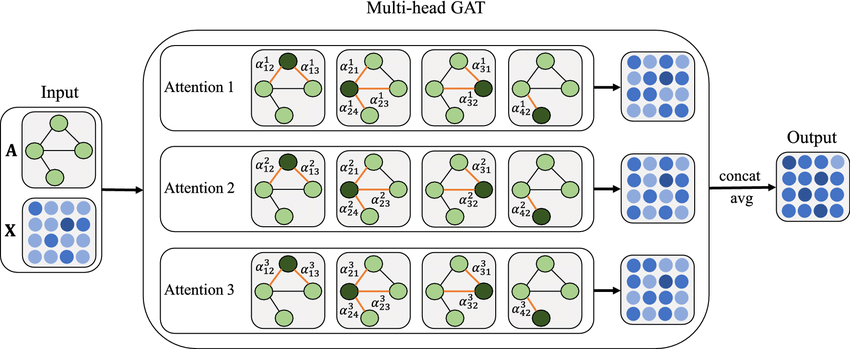

GIN LAYERS

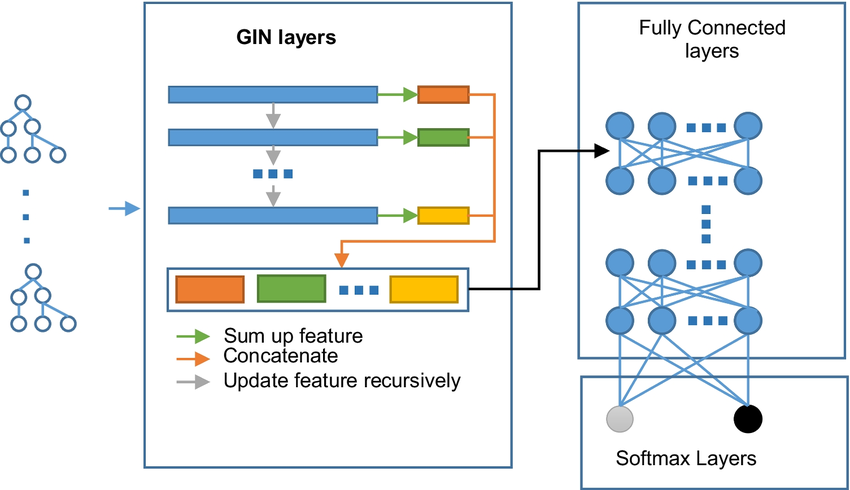

## Training and testing pipeline

In [ ]:
# Définition d'une fonction pour configurer et entraîner un modèle de graph neural network (GNN).
def pipeline(model_name='GCN', hidden_size=16, learning_rate=0.01):
    # Choix du modèle de GNN : GCN, SAGE, GAT ou GIN.
    if model_name == 'GCN':
        model = GCN(train_g.ndata['feat'].shape[1], hidden_size)
    elif model_name == 'SAGE':
        model = GraphSAGE(train_g.ndata['feat'].shape[1], hidden_size)
    elif model_name == 'GAT':
        model = GAT(train_g.ndata['feat'].shape[1], hidden_size)
    elif model_name == 'GIN':
        model = GIN(train_g.ndata['feat'].shape[1], hidden_size)

    # Initialisation du prédicteur pour le modèle.
    pred = DotPredictor()

    # Définition de la fonction de perte utilisant la cross entropy.
    def compute_loss(pos_score, neg_score):
        scores = F.sigmoid(torch.cat([pos_score, neg_score]))
        labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
        return F.binary_cross_entropy_with_logits(scores, labels)

    # Définition de la fonction pour calculer le score AUC.
    def compute_auc(pos_score, neg_score):
        scores = F.sigmoid(torch.cat([pos_score, neg_score])).numpy()
        labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
        return roc_auc_score(labels, scores)

    # Définition de la fonction pour calculer la précision (accuracy).
    def compute_acc(pos_score, neg_score):
      scores = F.sigmoid(torch.cat([pos_score, neg_score])).numpy()
      scores = scores>0.5
      labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
      return accuracy_score(labels, scores)

    # Configuration de l'optimiseur.
    optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=learning_rate)

    # Boucle d'entraînement.
    for e in range(100):
        # Calcul des embeddings des nœuds.
        h = model(train_g, train_g.ndata['feat'])
        # Calcul des scores pour les échantillons positifs et négatifs.
        pos_score = pred(train_pos_g, h)
        neg_score = pred(train_neg_g, h)
        # Calcul de la perte et mise à jour du modèle.
        loss = compute_loss(pos_score, neg_score)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Test du modèle sur les données de test.
        test_pos_score = pred(test_pos_g, h)
        test_neg_score = pred(test_neg_g, h)
        test_loss = compute_loss(test_pos_score, test_neg_score)
        # Sauvegarde du meilleur modèle.
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            torch.save(model.state_dict(), 'best_model.pth')
        # Affichage des résultats tous les 5 epochs.
        if e % 5 == 0:
            print(f'In epoch {e}, train_loss: {loss:.3f}, test_loss: {test_loss:.3f}')

    # Chargement du meilleur modèle et évaluation sur les données de test.
    model.load_state_dict(torch.load('best_model.pth'))
    h = model(train_g, train_g.ndata['feat'])
    with torch.no_grad():
        pos_score = pred(test_pos_g, h)
        neg_score = pred(test_neg_g, h)
        AUC = compute_auc(pos_score, neg_score)
        Acc = compute_acc(pos_score, neg_score)
        print('Acc', Acc)
        print('AUC', AUC)

    # Retourne les embeddings des nœuds et les scores de performance.
    return h, AUC, Acc


* DotPredictor est une partie importante du modèle qui permet de quantifier la similarité entre les nœuds et de prédire la présence ou l'absence d'arêtes dans le graphe en utilisant des scores de similarité calculés à partir des embeddings des nœuds. C'est un composant essentiel de l'apprentissage sur les graphes pour des tâches telles que la recommandation d'amis, la classification de nœuds, ou la prédiction de liens.

* La fonction sigmoïde (sigmoid en anglais) est couramment utilisée dans les tâches de classification binaire, y compris dans les tâches de prédiction de liens dans les graphes. Elle est utilisée pour transformer des valeurs continues en une plage entre 0 et 1. Voici pourquoi la sigmoïde est utilisée dans la fonction compute_loss :
* Interprétation Probabiliste : La sigmoïde est souvent utilisée pour représenter des probabilités. Elle prend une valeur continue en entrée et la transforme en une valeur dans l'intervalle [0, 1], ce qui est interprété comme la probabilité d'appartenir à la classe positive (dans ce cas, la probabilité que l'arête existe entre deux nœuds).

* Mesure de Similarité : Dans le contexte de la prédiction de liens dans les graphes, les scores d'affinité (similarité) entre les paires de nœuds peuvent être des valeurs continues qui représentent à quel point les nœuds sont similaires ou liés. La sigmoïde est utilisée pour transformer ces scores en une valeur entre 0 et 1, ce qui peut être interprété comme la probabilité que l'arête existe.


* Fonction de Perte : La perte binaire croisée (binary cross-entropy loss) est couramment utilisée pour mesurer la divergence entre les probabilités prédites (à l'aide de la sigmoïde) et les étiquettes réelles (1 pour les arêtes existantes, 0 pour les arêtes absentes). La sigmoïde est intégrée dans cette perte pour calculer les probabilités prédites.

In [ ]:
a = np.array([1,2,3,4])
1/(1+np.exp(-a))

array([0.73105858, 0.88079708, 0.95257413, 0.98201379])

Ce sont les valeurs calculées en appliquant la fonction sigmoïde à chaque élément du tableau a. La fonction sigmoïde transforme chaque valeur en une valeur dans l'intervalle [0, 1], ce qui est typique de la fonction sigmoïde.

## Hyperparameter tuning & model comparisons

* L'hyperparameter tuning (ajustement des hyperparamètres) est un processus essentiel en apprentissage automatique qui consiste à trouver les meilleurs hyperparamètres pour un modèle donné afin d'optimiser ses performances.
* Les hyperparamètres sont des paramètres du modèle qui ne sont pas appris à partir des données, mais qui sont configurés avant le processus d'apprentissage.
* Ils déterminent la structure et le comportement du modèle, et leur choix peut avoir un impact significatif sur les performances du modèle.



In [ ]:
def tuning(model_name: str):
    # Définition des hyperparamètres à tester
    # Définition des tailles cachées (hidden sizes) à tester.
    hidden_size = [8, 16, 32, 64]

    # Définition des taux d'apprentissage (learning rates) à tester.
    learning_rate = [0.1, 0.01, 0.005, 0.001]


    # Initialisation des meilleures valeurs et hyperparamètres
    best_auc = 0
    best_acc = 0
    best_hs = 0
    best_lr = 0
    best_h = None

    # Boucle pour tester différentes combinaisons d'hyperparamètres
    for hs in hidden_size:
        for lr in learning_rate:
            print(f'*** hidden size: {hs}, learning rate: {lr}***')

            # Appel de la fonction pipeline avec les hyperparamètres actuels
            h, auc, acc = pipeline(model_name, hs, lr)

            # Mise à jour des meilleures performances et hyperparamètres si nécessaire
            if auc > best_auc:
                best_auc = auc
                best_hs = hs
                best_lr = lr
                best_h = h
            if acc > best_acc:
                best_acc = acc

    # Affichage des résultats
    print(50 * "=")
    print(f'Best AUC obtained {best_auc:.3f} at hidden size {best_hs} and learning rate {best_lr}')
    print(f'Best Acc obtained {best_acc:.3f} at hidden size {best_hs} and learning rate {best_lr}')

    # Retourne les meilleures embeddings, AUC et accuracy
    return best_h, best_auc, best_acc


In [ ]:
h_GCN, AUC_GCN, Acc_GCN = tuning("GCN")

*** hidden size: 8, learning rate: 0.1***
In epoch 0, train_loss: 0.723, test_loss: 0.723
In epoch 5, train_loss: 0.668, test_loss: 0.664
In epoch 10, train_loss: 0.658, test_loss: 0.662
In epoch 15, train_loss: 0.657, test_loss: 0.661
In epoch 20, train_loss: 0.655, test_loss: 0.660
In epoch 25, train_loss: 0.655, test_loss: 0.660
In epoch 30, train_loss: 0.655, test_loss: 0.660
In epoch 35, train_loss: 0.655, test_loss: 0.660
In epoch 40, train_loss: 0.655, test_loss: 0.660
In epoch 45, train_loss: 0.655, test_loss: 0.660
In epoch 50, train_loss: 0.655, test_loss: 0.660
In epoch 55, train_loss: 0.655, test_loss: 0.660
In epoch 60, train_loss: 0.655, test_loss: 0.660
In epoch 65, train_loss: 0.655, test_loss: 0.660
In epoch 70, train_loss: 0.655, test_loss: 0.660
In epoch 75, train_loss: 0.655, test_loss: 0.660
In epoch 80, train_loss: 0.655, test_loss: 0.660
In epoch 85, train_loss: 0.655, test_loss: 0.660
In epoch 90, train_loss: 0.655, test_loss: 0.660
In epoch 95, train_loss: 0.65

In [ ]:
h_SAGE, AUC_SAGE, Acc_SAGE = tuning("SAGE")

*** hidden size: 8, learning rate: 0.1***
In epoch 0, train_loss: 0.786, test_loss: 0.783
In epoch 5, train_loss: 0.813, test_loss: 0.813
In epoch 10, train_loss: 0.813, test_loss: 0.813
In epoch 15, train_loss: 0.813, test_loss: 0.813
In epoch 20, train_loss: 0.813, test_loss: 0.813
In epoch 25, train_loss: 0.813, test_loss: 0.813
In epoch 30, train_loss: 0.813, test_loss: 0.813
In epoch 35, train_loss: 0.813, test_loss: 0.813
In epoch 40, train_loss: 0.813, test_loss: 0.813
In epoch 45, train_loss: 0.813, test_loss: 0.813
In epoch 50, train_loss: 0.813, test_loss: 0.813
In epoch 55, train_loss: 0.813, test_loss: 0.813
In epoch 60, train_loss: 0.813, test_loss: 0.813
In epoch 65, train_loss: 0.813, test_loss: 0.813
In epoch 70, train_loss: 0.813, test_loss: 0.813
In epoch 75, train_loss: 0.813, test_loss: 0.813
In epoch 80, train_loss: 0.813, test_loss: 0.813
In epoch 85, train_loss: 0.813, test_loss: 0.813
In epoch 90, train_loss: 0.813, test_loss: 0.813
In epoch 95, train_loss: 0.81

In [ ]:
h_GAT, AUC_GAT, Acc_GAT = tuning("GAT")

*** hidden size: 8, learning rate: 0.1***
In epoch 0, train_loss: 0.755, test_loss: 0.754
In epoch 5, train_loss: 0.813, test_loss: 0.813
In epoch 10, train_loss: 0.813, test_loss: 0.813
In epoch 15, train_loss: 0.813, test_loss: 0.813
In epoch 20, train_loss: 0.813, test_loss: 0.813
In epoch 25, train_loss: 0.813, test_loss: 0.813
In epoch 30, train_loss: 0.813, test_loss: 0.813
In epoch 35, train_loss: 0.813, test_loss: 0.813
In epoch 40, train_loss: 0.813, test_loss: 0.813
In epoch 45, train_loss: 0.813, test_loss: 0.813
In epoch 50, train_loss: 0.813, test_loss: 0.813
In epoch 55, train_loss: 0.813, test_loss: 0.813
In epoch 60, train_loss: 0.813, test_loss: 0.813
In epoch 65, train_loss: 0.813, test_loss: 0.813
In epoch 70, train_loss: 0.813, test_loss: 0.813
In epoch 75, train_loss: 0.813, test_loss: 0.813
In epoch 80, train_loss: 0.813, test_loss: 0.813
In epoch 85, train_loss: 0.813, test_loss: 0.813
In epoch 90, train_loss: 0.813, test_loss: 0.813
In epoch 95, train_loss: 0.81

In [ ]:
 #h_GAT, AUC_GAT, Acc_GAT = tuning("GAT")

In [ ]:
h_GIN, AUC_GIN, Acc_GIN = tuning("GIN")

*** hidden size: 8,learning rate: 0.1***
In epoch 0, train_loss: 0.694, test_loss: 0.694
In epoch 5, train_loss: 0.739, test_loss: 0.739
In epoch 10, train_loss: 0.726, test_loss: 0.726
In epoch 15, train_loss: 0.726, test_loss: 0.726
In epoch 20, train_loss: 0.727, test_loss: 0.727
In epoch 25, train_loss: 0.725, test_loss: 0.725
In epoch 30, train_loss: 0.724, test_loss: 0.724
In epoch 35, train_loss: 0.725, test_loss: 0.725
In epoch 40, train_loss: 0.724, test_loss: 0.724
In epoch 45, train_loss: 0.724, test_loss: 0.724
In epoch 50, train_loss: 0.724, test_loss: 0.724
In epoch 55, train_loss: 0.724, test_loss: 0.724
In epoch 60, train_loss: 0.724, test_loss: 0.724
In epoch 65, train_loss: 0.724, test_loss: 0.724
In epoch 70, train_loss: 0.724, test_loss: 0.724
In epoch 75, train_loss: 0.724, test_loss: 0.724
In epoch 80, train_loss: 0.724, test_loss: 0.724
In epoch 85, train_loss: 0.724, test_loss: 0.724
In epoch 90, train_loss: 0.724, test_loss: 0.724
In epoch 95, train_loss: 0.724

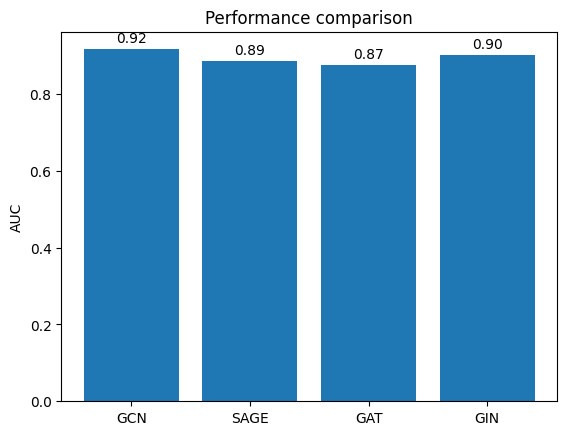

In [ ]:
import matplotlib.pyplot as plt
AUC_list = [AUC_GCN, AUC_SAGE, AUC_GAT, AUC_GIN]
AUC_name = ['GCN',"SAGE","GAT",'GIN']

# create a bar plot
fig, ax = plt.subplots()
rects = ax.bar(range(len(AUC_list)), AUC_list)

# add labels to the top of each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# set labels and title
ax.set_xticks(range(len(AUC_list)))
ax.set_xticklabels(AUC_name)
ax.set_ylabel('AUC')
ax.set_title('Performance comparison')

# display the plot
plt.show()

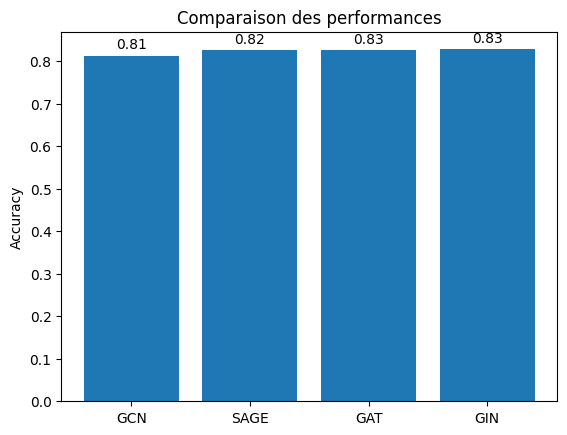

In [ ]:
# Importation de la bibliothèque matplotlib pour la création de graphiques
import matplotlib.pyplot as plt

# Liste des valeurs d'exactitude pour chaque modèle
Acc_list = [Acc_GCN, Acc_SAGE, Acc_GAT, Acc_GIN]

# Noms des modèles correspondant à chaque valeur d'exactitude
model_name = ['GCN', "SAGE", "GAT", 'GIN']

# Création d'un graphique à barres
fig, ax = plt.subplots()
rects = ax.bar(range(len(Acc_list)), Acc_list)

# Ajout d'étiquettes en haut de chaque barre pour afficher les valeurs d'exactitude
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Définition des labels et du titre du graphique
ax.set_xticks(range(len(Acc_list)))
ax.set_xticklabels(model_name)
ax.set_ylabel('Accuracy')
ax.set_title('Comparaison des performances')

# Affichage du graphique
plt.show()


In [ ]:
! pip install numpy scipy torch torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.5 MB/s eta 0:00:00


In [ ]:
! pip install torch dgl

In [ ]:
# Importation des bibliothèques nécessaires
import dgl             # Importe la bibliothèque DGL pour le traitement de graphes
import torch           # Importe la bibliothèque PyTorch pour le calcul tensoriel
import torch.nn as nn  # Importe le module nn (neural network) de PyTorch
import torch.nn.functional as F  # Importe les fonctions de PyTorch pour les opérations tensorielles
import numpy as np      # Importe la bibliothèque NumPy pour les opérations numériques


In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np        # Importe la bibliothèque NumPy pour les opérations numériques
import scipy.sparse as sp # Importe la bibliothèque SciPy pour les opérations sur les matrices creuses
import torch              # Importe la bibliothèque PyTorch pour le calcul tensoriel
from torch_geometric.data import Data  # Importe la classe Data de torch_geometric pour stocker les données du graphe
from torch_geometric.nn import GCNConv  # Importe la couche GCNConv de torch_geometric pour les convolutions graphiques


In [ ]:
# Fonction pour encoder les étiquettes en one-hot
def encode_onehot(labels):
    # Créer un ensemble des classes uniques dans les étiquettes
    classes = set(labels)
    # Créer un dictionnaire où chaque classe est associée à sa représentation one-hot
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in enumerate(classes)}
    # Appliquer la transformation one-hot à chaque étiquette et renvoyer le résultat sous forme de tableau NumPy
    return np.array(list(map(classes_dict.get, labels)), dtype=np.int32)

# Fonction pour normaliser une matrice creuse
def normalize(mx):
    # Calculer la somme des valeurs de chaque ligne de la matrice
    rowsum = np.array(mx.sum(1))
    # Calculer l'inverse de la somme des valeurs de chaque ligne
    r_inv = np.power(rowsum, -1).flatten()
    # Remplacer les valeurs infinies résultant de la normalisation par 0
    r_inv[np.isinf(r_inv)] = 0.
    # Créer une matrice diagonale creuse avec les inverses des sommes et normaliser la matrice d'origine
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    # Renvoyer la matrice normalisée
    return mx

# Fonction pour convertir une matrice creuse NumPy en tenseur creux PyTorch
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    # Convertir la matrice creuse en format COO (coordonnées) et la convertir en type de données float32
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    # Construire les indices et les valeurs à partir de la représentation COO
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    # Créer et renvoyer un tenseur creux PyTorch avec les indices, les valeurs et la forme corrects
    return torch.sparse.FloatTensor(indices, values, shape)


In [ ]:
# Initialiser le modèle
model = GCN(in_feats=244, h_feats=16)

# Fonction de perte et optimiseur
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [ ]:
# Extraire les indices des bords du graphique d'entraînement positif
train_pos_eids = train_pos_g.edges(form='eid')



### GCN

 un modèle GCN (Graph Convolutional Network) pour la prédiction de liens dans un graphe en utilisant DGL (Deep Graph Library).

Nous créons un graphe factice g avec 5 nœuds et quelques arêtes.
Les caractéristiques d'entrée x sont définies de manière aléatoire pour chaque nœud du graphe.
* Le modèle GCN est instancié avec in_feats et h_feats spécifiés.
Enfin, nous effectuons une propagation avant sur le modèle GCN en utilisant le graphe g et les caractéristiques d'entrée x. La sortie output du modèle est affichée.
* L'entrée du modèle GCN est généralement un graphe g représentant la structure des données et une matrice de caractéristiques x où chaque ligne correspond à un nœud dans le graphe et chaque colonne correspond à une caractéristique du nœud. Le modèle effectue ensuite une propagation d'information à travers le graphe pour produire une sortie en fonction de ces caractéristiques d'entrée.

In [ ]:
# Importation des bibliothèques nécessaires
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl
from dgl.nn import GraphConv
import itertools
from sklearn.metrics import roc_auc_score, accuracy_score

# Définition du modèle GCN
class GCN(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GCN, self).__init__()
        self.conv1 = GraphConv(in_feats, h_feats)
        self.conv2 = GraphConv(h_feats, h_feats)

    def forward(self, g, in_feat):
        g = dgl.add_self_loop(g)  # Ajout de boucles de rappel aux nœuds
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

# DotPredictor pour la prédiction de lien
class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():  # Crée une portée locale pour g (graphe)
            g.ndata['h'] = h  # Ajout des embeddings des nœuds au graphe
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))  # Calcule le produit scalaire entre les embeddings des nœuds
            return g.edata['score'][:, 0]

# Fonction pour calculer la perte
def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])  # Concatène les scores positifs et négatifs
    labels = torch.cat([torch.ones_like(pos_score), torch.zeros_like(neg_score)])  # Crée les étiquettes correspondantes
    return F.binary_cross_entropy_with_logits(scores, labels)  # Calcule la perte de régression logistique binaire

# Initialisation du modèle GCN et du prédicteur
model = GCN(g.ndata['feat'].shape[1], 16)  # Crée une instance du modèle GCN avec 16 dimensions cachées
pred = DotPredictor()  # Crée une instance du prédicteur DotPredictor

optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)  # Initialise l'optimiseur
losses = []  # Liste pour stocker les pertes
auc_scores = []  # Liste pour stocker les scores AUC

# Boucle d'entraînement
for e in range(100):
    h = model(g, g.ndata['feat'])  # Passe les données d'entrée à travers le modèle GCN
    pos_score = pred(train_pos_g, h)  # Calcule les scores de prédiction positifs
    neg_score = pred(train_neg_g, h)  # Calcule les scores de prédiction négatifs
    loss = compute_loss(pos_score, neg_score)  # Calcule la perte

    optimizer.zero_grad()  # Réinitialise les gradients
    loss.backward()  # Rétropropagation pour calculer les gradients
    optimizer.step()  # Met à jour les poids du modèle
    losses.append(loss.item())  # Ajoute la perte à la liste des pertes

    if e % 5 == 0:
        print(f'Epoch {e}, Loss: {loss.item()}')  # Affiche la perte à chaque 5 époques

model.train()  # Met le modèle en mode d'entraînement
# Évaluation
model.eval()  # Met le modèle en mode d'évaluation (désactive le dropout, etc.)
with torch.no_grad():
    h = model(g, g.ndata['feat'])  # Passe les données d'entrée à travers le modèle GCN
    pos_score = pred(test_pos_g, h)  # Calcule les scores de prédiction positifs pour les données de test
    neg_score = pred(test_neg_g, h)  # Calcule les scores de prédiction négatifs pour les données de test
    AUC = roc_auc_score(torch.cat([torch.ones_like(pos_score), torch.zeros_like(neg_score)]).numpy(), torch.cat([pos_score, neg_score]).numpy())  # Calcule l'AUC
    auc_scores.append(AUC)  # Ajoute l'AUC à la liste des scores AUC
    print('AUC:', AUC)  # Affiche l'AUC


Epoch 0, Loss: 0.6606910228729248
Epoch 5, Loss: 0.5459356307983398
Epoch 10, Loss: 0.5124385952949524
Epoch 15, Loss: 0.4902699589729309
Epoch 20, Loss: 0.4798162579536438
Epoch 25, Loss: 0.4741542637348175
Epoch 30, Loss: 0.47091105580329895
Epoch 35, Loss: 0.46536365151405334
Epoch 40, Loss: 0.4604901671409607
Epoch 45, Loss: 0.4556134045124054
Epoch 50, Loss: 0.45053577423095703
Epoch 55, Loss: 0.44571876525878906
Epoch 60, Loss: 0.44092270731925964
Epoch 65, Loss: 0.43652400374412537
Epoch 70, Loss: 0.4321669638156891
Epoch 75, Loss: 0.42802831530570984
Epoch 80, Loss: 0.42494454979896545
Epoch 85, Loss: 0.4223371744155884
Epoch 90, Loss: 0.419638067483902
Epoch 95, Loss: 0.4169134199619293
AUC: 0.9528338620686333


In [ ]:
# Initialisation des variables pour l'early stopping et pour enregistrer les scores AUC
best_auc = float('-inf')  # Meilleur score AUC initialisé à négatif infini
patience = 10  # Nombre maximum d'époques à attendre sans amélioration
wait = 0  # Initialisation du compteur d'attente
best_state_dict = None  # Initialisation du dictionnaire d'état du meilleur modèle
auc_scores = []  # Liste pour enregistrer les scores AUC à chaque intervalle d'évaluation

# Boucle d'entraînement
for e in range(100):  # Boucle sur un maximum de 100 époques
    model.train()  # Met le modèle en mode d'entraînement
    h = model(g, g.ndata['feat'])  # Passe les données d'entrée à travers le modèle GCN
    pos_score = pred(train_pos_g, h)  # Calcule les scores de prédiction positifs pour l'ensemble d'entraînement
    neg_score = pred(train_neg_g, h)  # Calcule les scores de prédiction négatifs pour l'ensemble d'entraînement
    loss = compute_loss(pos_score, neg_score)  # Calcule la perte

    optimizer.zero_grad()  # Réinitialise les gradients
    loss.backward()  # Rétropropagation pour calculer les gradients
    optimizer.step()  # Met à jour les poids du modèle

    # Évaluation sur l'ensemble de validation toutes les 5 époques
    if e % 5 == 0:
        model.eval()  # Met le modèle en mode d'évaluation (désactive le dropout, etc.)
        with torch.no_grad():
            h = model(g, g.ndata['feat'])  # Passe les données d'entrée à travers le modèle GCN
            val_pos_score = pred(train_pos_g, h)  # Calcule les scores de prédiction positifs pour l'ensemble de validation
            val_neg_score = pred(train_neg_g, h)  # Calcule les scores de prédiction négatifs pour l'ensemble de validation
            val_auc = roc_auc_score(
                torch.cat([torch.ones_like(val_pos_score), torch.zeros_like(val_neg_score)]).numpy(),
                torch.cat([val_pos_score, val_neg_score]).numpy()
            )  # Calcule l'AUC sur l'ensemble de validation
            auc_scores.append(val_auc)  # Enregistre le score AUC dans la liste

            print(f'Epoch {e}, Loss: {loss.item()}, Val AUC: {val_auc}')

            if val_auc > best_auc:
                best_auc = val_auc  # Met à jour le meilleur score AUC
                wait = 0  # Réinitialise le compteur d'attente
                best_state_dict = model.state_dict()  # Sauvegarde l'état du meilleur modèle
            else:
                wait += 1  # Incrémente le compteur d'attente
                if wait >= patience:
                    print(f'Early stopping at epoch {e}')  # Arrête tôt l'entraînement
                    break  # Sort de la boucle d'entraînement

# Après la boucle d'entraînement, chargez le meilleur état du modèle
if best_state_dict is not None:
    model.load_state_dict(best_state_dict)


Epoch 0, Loss: 0.4142937660217285, Val AUC: 0.9597741236967462
Epoch 5, Loss: 0.4116392433643341, Val AUC: 0.9606914266379918
Epoch 10, Loss: 0.40888363122940063, Val AUC: 0.9618031068040148
Epoch 15, Loss: 0.4059094488620758, Val AUC: 0.9629695711216859
Epoch 20, Loss: 0.4029296338558197, Val AUC: 0.9638984096840052
Epoch 25, Loss: 0.3999525010585785, Val AUC: 0.9645346775641173
Epoch 30, Loss: 0.3970580995082855, Val AUC: 0.9649012450351611
Epoch 35, Loss: 0.39464071393013, Val AUC: 0.9651351729607616
Epoch 40, Loss: 0.39337754249572754, Val AUC: 0.9650363765963069
Epoch 45, Loss: 0.39052483439445496, Val AUC: 0.9658035958821933
Epoch 50, Loss: 0.3889831006526947, Val AUC: 0.9659113152706141
Epoch 55, Loss: 0.3869518041610718, Val AUC: 0.9660242598532492
Epoch 60, Loss: 0.38515153527259827, Val AUC: 0.9666117324581588
Epoch 65, Loss: 0.38333660364151, Val AUC: 0.9668662396102038
Epoch 70, Loss: 0.3815872073173523, Val AUC: 0.9671150392424143
Epoch 75, Loss: 0.3798498213291168, Val AU

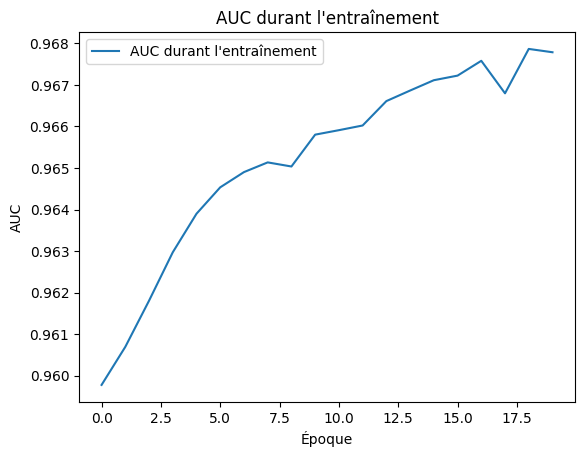

In [ ]:
import matplotlib.pyplot as plt

# Tracer la courbe AUC
plt.plot( auc_scores, label='AUC durant l\'entraînement')
plt.title('AUC durant l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('AUC')
plt.legend()
plt.show()


In [ ]:
# Boucle d'entraînement sans arrêt anticipé
for e in range(100):
    model.train()  # Met le modèle en mode d'entraînement
    g = dgl.add_self_loop(g)  # Ajoute des auto-arêtes au graphe
    h = model(g, g.ndata['feat'])  # Passe les données d'entrée à travers le modèle GCN
    pos_score = pred(train_pos_g, h)  # Calcule les scores de prédiction positifs pour l'ensemble d'entraînement
    neg_score = pred(train_neg_g, h)  # Calcule les scores de prédiction négatifs pour l'ensemble d'entraînement
    loss = compute_loss(pos_score, neg_score)  # Calcule la perte

    losses.append(loss.item())  # Enregistre la perte à chaque époque

    optimizer.zero_grad()  # Réinitialise les gradients
    loss.backward()  # Rétropropagation pour calculer les gradients
    optimizer.step()  # Met à jour les poids du modèle

    if e % 5 == 0:  # Calcule l'AUC tous les 5 épisodes
        model.eval()  # Met le modèle en mode d'évaluation (désactive le dropout, etc.)
        with torch.no_grad():
            pos_score = pred(test_pos_g, h)  # Calcule les scores de prédiction positifs pour l'ensemble de test
            neg_score = pred(test_neg_g, h)  # Calcule les scores de prédiction négatifs pour l'ensemble de test
            AUC = roc_auc_score(
                torch.cat([torch.ones_like(pos_score), torch.zeros_like(neg_score)]).numpy(),
                torch.cat([pos_score, neg_score]).numpy()
            )  # Calcule l'AUC
            auc_scores.append(AUC)  # Enregistre l'AUC à chaque époque
            print(f'Epoch {e}, Loss: {loss.item()}, AUC: {AUC}')


Epoch 0, Loss: 0.3723432421684265, AUC: 0.9370769223356974
Epoch 5, Loss: 0.39265114068984985, AUC: 0.9115574689208324
Epoch 10, Loss: 0.3933117985725403, AUC: 0.8997162217858798
Epoch 15, Loss: 0.3829825520515442, AUC: 0.8960904831587988
Epoch 20, Loss: 0.3723088800907135, AUC: 0.896349777344258
Epoch 25, Loss: 0.36259984970092773, AUC: 0.8948982555020081
Epoch 30, Loss: 0.3520071804523468, AUC: 0.8928453638681436
Epoch 35, Loss: 0.34081703424453735, AUC: 0.8901183949514722
Epoch 40, Loss: 0.33100879192352295, AUC: 0.8871238099075781
Epoch 45, Loss: 0.3224351108074188, AUC: 0.8827784423164606
Epoch 50, Loss: 0.31455522775650024, AUC: 0.8790427664587204
Epoch 55, Loss: 0.3067435920238495, AUC: 0.8749899808201141
Epoch 60, Loss: 0.2990683317184448, AUC: 0.8725350080000139
Epoch 65, Loss: 0.29140907526016235, AUC: 0.8716020745286823
Epoch 70, Loss: 0.2839079797267914, AUC: 0.8707479805056325
Epoch 75, Loss: 0.2772895395755768, AUC: 0.8700449954251221
Epoch 80, Loss: 0.2700239419937134, A

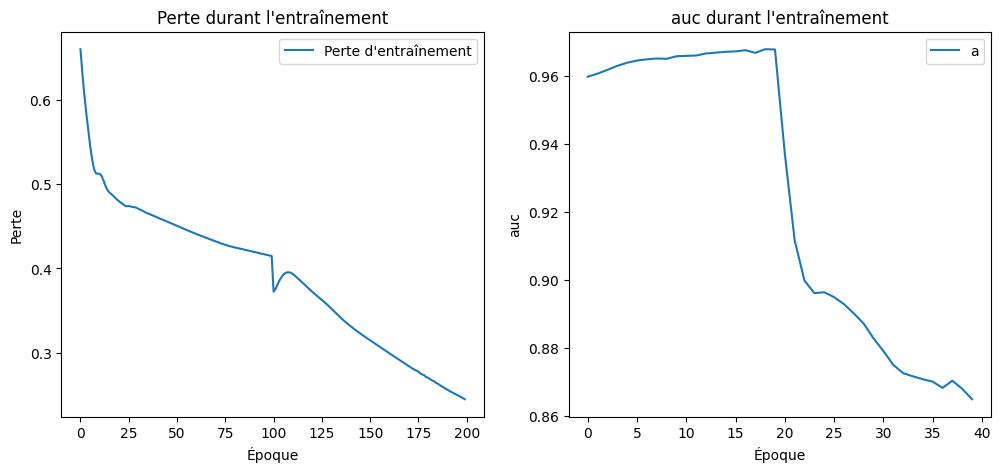

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses, label='Perte d\'entraînement')
plt.title('Perte durant l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(auc_scores, label='auc d\'entraînement')
plt.title('auc durant l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('auc')
plt.legend("auc ")

## MLP

Un modèle MLP, ou Multilayer Perceptron, est un type de modèle de réseau neuronal artificiel composé de plusieurs couches de neurones, y compris une couche d'entrée, une ou plusieurs couches cachées et une couche de sortie. Chaque couche est composée de plusieurs neurones (également appelés nœuds ou unités) qui sont connectés aux neurones de la couche précédente et de la couche suivante.



MLP (Multilayer Perceptron) : . Il est utilisé pour des tâches de classification et de régression. Dans le contexte des réseaux sociaux, un MLP  utilisé pour prédire des attributs de nœuds ou des liens en utilisant des caractéristiques prétraitées.

In [ ]:
# Importation de la bibliothèque PyTorch pour le calcul tensoriel
import torch

# Importation du module torch.nn qui contient des composants pour la création de réseaux neuronaux
import torch.nn as nn

# Importation du module torch.nn.functional qui contient des fonctions d'activation et de perte couramment utilisées
import torch.nn.functional as F


In [ ]:
class MLP(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_feats, h_feats)  # in_feats doit correspondre à la taille des caractéristiques des nœuds
        self.fc2 = nn.Linear(h_feats, h_feats)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)


ette classe MLP définit un modèle de réseau de neurones à deux couches qui peut être utilisé pour effectuer des transformations linéaires et des opérations d'apprentissage automatique sur des données d'entrée. La fonction d'activation ReLU est utilisée entre les couches pour introduire de la non-linéarité dans le modèle.







In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, accuracy_score

class MLP(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(MLP, self).__init__()
        # Couche linéaire 1 : Transforme les caractéristiques d'entrée en caractéristiques cachées
        self.fc1 = nn.Linear(in_feats, h_feats)  # in_feats doit correspondre à la taille des caractéristiques des nœuds
        # Couche linéaire 2 : Transforme les caractéristiques cachées en caractéristiques de sortie
        self.fc2 = nn.Linear(h_feats, h_feats)

    def forward(self, x):
        # Fonction d'activation ReLU appliquée à la première couche linéaire
        x = F.relu(self.fc1(x))
        # La sortie de la première couche est transformée par la deuxième couche linéaire
        return self.fc2(x)


# Lors de l'initialisation du modèle
in_feats = g.ndata['feat'].shape[1]  # Taille des caractéristiques des nœuds
h_feats = 16  # Taille arbitraire de la couche cachée
model = MLP(in_feats, h_feats)

# Définition de la classe DotPredictor
class DotPredictor(nn.Module):
    def forward(self, u, v):
        # u et v sont des tenseurs contenant les embeddings des nœuds
        return torch.sum(u * v, dim=1)

# Fonction pour calculer la perte
def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones_like(pos_score), torch.zeros_like(neg_score)])
    return F.binary_cross_entropy_with_logits(scores, labels)

# Initialisation du modèle MLP et du prédicteur
input_features = 224  # Remplacer par le nombre de features en entrée
model = MLP(input_features, 16)
pred = DotPredictor()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
losses = []
auc_scores = []


In [ ]:
# Exemple d'utilisation dans la boucle d'entraînement
for e in range(100):
    model.train()
    h = model(g.ndata['feat'])  # Obtenez les embeddings des nœuds
    pos_score = pred(h[train_pos_u], h[train_pos_v])  # train_pos_u, train_pos_v sont les indices des nœuds dans les paires positives
    neg_score = pred(h[train_neg_u], h[train_neg_v])  # train_neg_u, train_neg_v sont les indices des nœuds dans les paires négatives
    loss = compute_loss(pos_score, neg_score)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    los_s = losses.append(loss.item())

    if e % 5 == 0:
        print(f'Epoch {e}, Loss: {loss.item()}')



Epoch 0, Loss: 0.3423227071762085
Epoch 5, Loss: 0.334439218044281
Epoch 10, Loss: 0.32664602994918823
Epoch 15, Loss: 0.31879791617393494
Epoch 20, Loss: 0.31147265434265137
Epoch 25, Loss: 0.30429723858833313
Epoch 30, Loss: 0.29736700654029846
Epoch 35, Loss: 0.2912992537021637
Epoch 40, Loss: 0.2844584882259369
Epoch 45, Loss: 0.2789791226387024
Epoch 50, Loss: 0.2743716239929199
Epoch 55, Loss: 0.2691601812839508
Epoch 60, Loss: 0.2649696469306946
Epoch 65, Loss: 0.2612403929233551
Epoch 70, Loss: 0.2574215233325958
Epoch 75, Loss: 0.25347039103507996
Epoch 80, Loss: 0.24956560134887695
Epoch 85, Loss: 0.24615034461021423
Epoch 90, Loss: 0.24274444580078125
Epoch 95, Loss: 0.23950088024139404


In [ ]:
# Boucle d'entraînement
for e in range(100):
    model.train()
    h = model(g.ndata['feat'])  # Obtenez les embeddings des nœuds
    pos_score = pred(h[train_pos_u], h[train_pos_v])
    neg_score = pred(h[train_neg_u], h[train_neg_v])
    loss = compute_loss(pos_score, neg_score)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calcul de l'AUC toutes les 5 epochs
    if e % 5 == 0:
        model.eval()
        with torch.no_grad():
            h = model(g.ndata['feat'])
            test_pos_score = pred(h[test_pos_u], h[test_pos_v])
            test_neg_score = pred(h[test_neg_u], h[test_neg_v])
            AUC = roc_auc_score(torch.cat([torch.ones_like(test_pos_score), torch.zeros_like(test_neg_score)]).numpy(), torch.cat([test_pos_score, test_neg_score]).numpy())
            losses.append(loss.item())
            auc_scores.append(AUC)
        print(f'Epoch {e}, Loss: {loss.item()}, AUC: {AUC}')

Epoch 0, Loss: 0.23622243106365204, AUC: 0.7972117991118299
Epoch 5, Loss: 0.2330837845802307, AUC: 0.7978854383977021
Epoch 10, Loss: 0.23253688216209412, AUC: 0.793346038164425
Epoch 15, Loss: 0.229033425450325, AUC: 0.7953660800281719
Epoch 20, Loss: 0.22486230731010437, AUC: 0.7949946586273788
Epoch 25, Loss: 0.22200995683670044, AUC: 0.7964448664788243
Epoch 30, Loss: 0.21918044984340668, AUC: 0.7969362990397793
Epoch 35, Loss: 0.2169579714536667, AUC: 0.794272401681733
Epoch 40, Loss: 0.27707603573799133, AUC: 0.8025251399290707
Epoch 45, Loss: 0.23869125545024872, AUC: 0.799030362385524
Epoch 50, Loss: 0.23168282210826874, AUC: 0.798261239767844
Epoch 55, Loss: 0.2229512631893158, AUC: 0.7988280078016013
Epoch 60, Loss: 0.2177087515592575, AUC: 0.7986904767640436
Epoch 65, Loss: 0.21373052895069122, AUC: 0.7987579282920177
Epoch 70, Loss: 0.21045438945293427, AUC: 0.7980518772329631
Epoch 75, Loss: 0.20799000561237335, AUC: 0.7983006594919849
Epoch 80, Loss: 0.2058253288269043, 

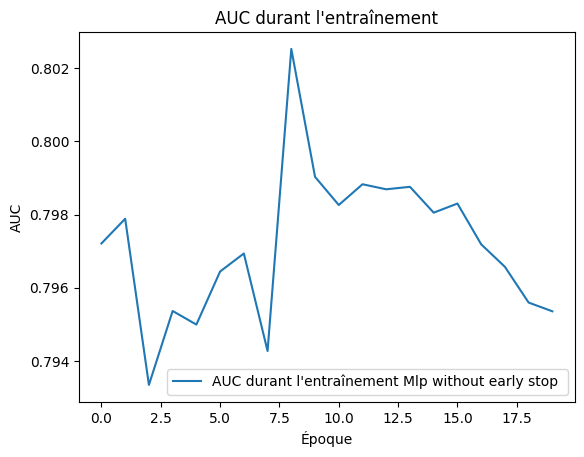

In [ ]:
import matplotlib.pyplot as plt

# Tracer la courbe AUC
plt.plot( auc_scores, label='AUC durant l\'entraînement Mlp without early stop ')
plt.title('AUC durant l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('AUC')
plt.legend()
plt.show()

 # Early stop MLP

In [ ]:
# Initialisation des variables pour l'early stopping
best_auc = float('-inf')
patience = 10  # Nombre d'époques à attendre après la dernière amélioration de performance
wait = 0       # Compteur d'époques depuis la dernière amélioration
best_state_dict = None  # Meilleur état du modèle

# Boucle d'entraînement
for e in range(100):
    model.train()
    h = model(g.ndata['feat'])  # Obtenez les embeddings des nœuds
    pos_score = pred(h[train_pos_u], h[train_pos_v])
    neg_score = pred(h[train_neg_u], h[train_neg_v])
    loss = compute_loss(pos_score, neg_score)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Évaluation sur l'ensemble de validation toutes les 5 epochs
    if e % 5 == 0:
        model.eval()
        with torch.no_grad():
            h = model(g.ndata['feat'])
            test_pos_score = pred(h[test_pos_u], h[test_pos_v])
            test_neg_score = pred(h[test_neg_u], h[test_neg_v])
            val_auc = roc_auc_score(torch.cat([torch.ones_like(val_pos_score), torch.zeros_like(val_neg_score)]).numpy(), torch.cat([val_pos_score, val_neg_score]).numpy())

            # Enregistrez la perte et l'AUC pour une éventuelle visualisation
            losses.append(loss.item())
            auc_scores.append(val_auc)

            # Affichage de la progression
            print(f'Epoch {e}, Loss: {loss.item()}, Validation AUC: {val_auc}')

            # Vérifiez si l'AUC actuelle est la meilleure
            if val_auc > best_auc:
                best_auc = val_auc
                wait = 0  # Réinitialisez le compteur d'attente
                best_state_dict = model.state_dict()  # Sauvegardez le meilleur état du modèle
            else:
                wait += 1  # Incrémentez le compteur d'attente
                if wait >= patience:
                    print(f'Early stopping at epoch {e}')
                    break  # Early stopping si aucune amélioration n'est observée pendant 'patience' époques

# Après la boucle d'entraînement, chargez le meilleur état du modèle
if best_state_dict is not None:
    model.load_state_dict(best_state_dict)


Epoch 0, Loss: 0.1990393102169037, Validation AUC: 0.9677886873580606
Epoch 5, Loss: 0.19766820967197418, Validation AUC: 0.9677886873580606
Epoch 10, Loss: 0.19635334610939026, Validation AUC: 0.9677886873580606
Epoch 15, Loss: 0.19509804248809814, Validation AUC: 0.9677886873580606
Epoch 20, Loss: 0.19386151432991028, Validation AUC: 0.9677886873580606
Epoch 25, Loss: 0.1926400363445282, Validation AUC: 0.9677886873580606
Epoch 30, Loss: 0.19145014882087708, Validation AUC: 0.9677886873580606
Epoch 35, Loss: 0.19026608765125275, Validation AUC: 0.9677886873580606
Epoch 40, Loss: 0.18909183144569397, Validation AUC: 0.9677886873580606
Epoch 45, Loss: 0.1879565417766571, Validation AUC: 0.9677886873580606
Epoch 50, Loss: 0.18682610988616943, Validation AUC: 0.9677886873580606
Early stopping at epoch 50


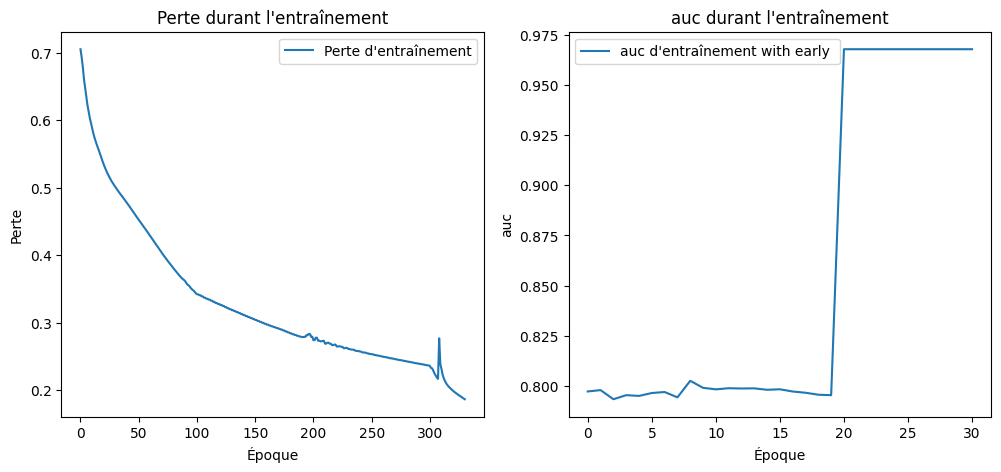

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Perte d\'entraînement')
plt.title('Perte durant l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(auc_scores, label='auc d\'entraînement with early ')
plt.title('auc durant l\'entraînement')
plt.xlabel('Époque')
plt.ylabel('auc')
plt.legend()

In [ ]:
print(g.ndata['feat'].shape)

torch.Size([347, 224])


# Deep

DeepWalk est une technique d'apprentissage automatique pour l'apprentissage de représentations de nœuds dans un graphe. Elle utilise des techniques similaires à celles des modèles de mots (comme Word2Vec) mais est appliquée aux graphes. DeepWalk fonctionne en générant des séquences de nœuds à partir de marches aléatoires dans le graphe, puis en utilisant ces séquences pour entraîner un modèle d'embedding de mots.





*   Générer des Marches Aléatoires :
*   Entraîner un Modèle Word2Vec :
*   Utiliser les Embeddings :





## Friend recommendation

Après avoir entraîné notre modèle, nous pouvons proposer des amis aux utilisateurs. Cela implique de calculer le produit scalaire des embeddings entre un utilisateur spécifique et tous les autres utilisateurs qui ne sont pas actuellement amis avec lui. Ensuite, nous sélectionnons les 5 meilleurs utilisateurs ayant les scores de produit scalaire les plus élevés et les suggérons comme des amis potentiels pour l'utilisateur.

---

In [ ]:
# --------- generate recommendation for user -------- #
def generate_rec(h, user_id=0):
    # `h` représente les embeddings des nœuds, avec une forme [num_nodes, hidden_size]

    # générer un graphe avec (num_nodes - num_friends_of_user) arêtes
    # une extrémité de l'arête est user_id
    # l'autre extrémité est un utilisateur qui n'est PAS ami avec user_id
    user_friends = set()
    user_neg_u, user_neg_v = [], []
    for n1, n2 in zip(u, v):   # obtenir tous les amis de l'utilisateur user_id
        if int(n1) == user_id:
            user_friends.add(int(n2))
        if int(n2) == user_id:
            user_friends.add(int(n1))

    for i in range(num_nodes):  # générer des "arêtes négatives" pour user_id
        if i != user_id and i not in user_friends:
            user_neg_u.append(user_id)
            user_neg_v.append(i)

    user_g = dgl.graph((user_neg_u, user_neg_v), num_nodes=g.number_of_nodes())

    pred = DotPredictor()

    # calculer le score de chaque utilisateur
    scores = [(i, score) for i, score in enumerate(pred(user_g, h))]

    # produire la liste classée finale
    scores.sort(key=lambda x: -x[1])

    # afficher les résultats
    print(f"Liste des 5 amis suggérés pour l'utilisateur {user_id}:")
    for i in range(5):
        print(f'- Utilisateur {scores[i][0]}, score = {scores[i][1]}')


The recommended users are shown as follows:

In [ ]:
generate_rec(h_GCN, user_id=0)

Liste des 5 amis suggérés pour l'utilisateur 0:
- Utilisateur 258, score = 5.86404275894165
- Utilisateur 24, score = 5.661108493804932
- Utilisateur 51, score = 5.440805912017822
- Utilisateur 239, score = 5.115089416503906
- Utilisateur 264, score = 5.0446882247924805
